In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import joblib


In [2]:
# Loading features and labels
features_dir = 'emotionverse_features_advanced'
X_tfidf = load_npz(os.path.join(features_dir, 'tfidf_features.npz')) #sim
X_bow = load_npz(os.path.join(features_dir, 'bow_features.npz'))  # sim 
labels_df = pd.read_csv(os.path.join(features_dir, 'emotionverse_labels.csv')) # sim
allminipro = np.load(os.path.join(features_dir, 'sentence_embeddings.npy')) #simm
tf_lexi = np.load(os.path.join(features_dir, 'tf_lexi.npy'),allow_pickle=True).item() # sim
tf_vader_file = np.load(os.path.join(features_dir, 'tf_vader_file.npy'),allow_pickle=True).item() #sim 
bert_vader_file = np.load(os.path.join(features_dir, 'bert_vader_file.npy'),allow_pickle=True).item()# sim
bert_lexi = np.load(os.path.join(features_dir, 'bert_lexi.npy'),allow_pickle=True).item() #sim
tf_bert_vader_file = np.load(os.path.join(features_dir, 'tf_bert_vader_file.npy'),allow_pickle=True).item() #sim  
tf_bert_lexi = np.load(os.path.join(features_dir, 'tf_bert_lexi.npy'),allow_pickle=True).item() #sim  
lexicon_features = np.load(os.path.join(features_dir, 'custom_lexicon_features.npy'),allow_pickle=True) 


# Needs to be scaled
bertsentencescaler = MinMaxScaler()
allminipro = bertsentencescaler.fit_transform(allminipro)

In [3]:
print(labels_df["sentiment"].value_counts())
y_sentiment = labels_df['sentiment']


sentiment
Mixed        652
Positive     542
Negative     419
Ambiguous    158
Neutral      103
Name: count, dtype: int64


# Let's do a overall model evaluation with the different features 


----- Training (TF-IDF) -----


c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()


----- Training (Bag of Words) -----

----- Training (Sentence Embeddings) -----


c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()


----- Training (TF-Lexicon) -----

----- Training (TF-VADER) -----

----- Training (BERT-VADER) -----


c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()


----- Training (BERT-Lexicon) -----

----- Training (TF-BERT-VADER) -----


c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()


----- Training (TF-BERT-Lexicon) -----


c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()


----- Training (Lexicon Features) -----


c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafa Parkoureiro\anaconda3\envs\NLP\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()


----- Overall Model Comparison -----
                                        Model  Accuracy  F1 Score (weighted)
39           Lexicon Features - Random Forest  0.933333             0.933430
37              Lexicon Features - Linear SVM  0.922667             0.923060
15                 TF-Lexicon - Random Forest  0.909333             0.909910
36     Lexicon Features - Logistic Regression  0.901333             0.900117
12           TF-Lexicon - Logistic Regression  0.888000             0.886801
27               BERT-Lexicon - Random Forest  0.880000             0.877535
24         BERT-Lexicon - Logistic Regression  0.880000             0.878186
32      TF-BERT-Lexicon - Logistic Regression  0.872000             0.868680
13                    TF-Lexicon - Linear SVM  0.850667             0.844486
25                  BERT-Lexicon - Linear SVM  0.837333             0.831319
35            TF-BERT-Lexicon - Random Forest  0.824000             0.808732
33               TF-BERT-Lexicon - Lin

<Figure size 2000x1000 with 0 Axes>

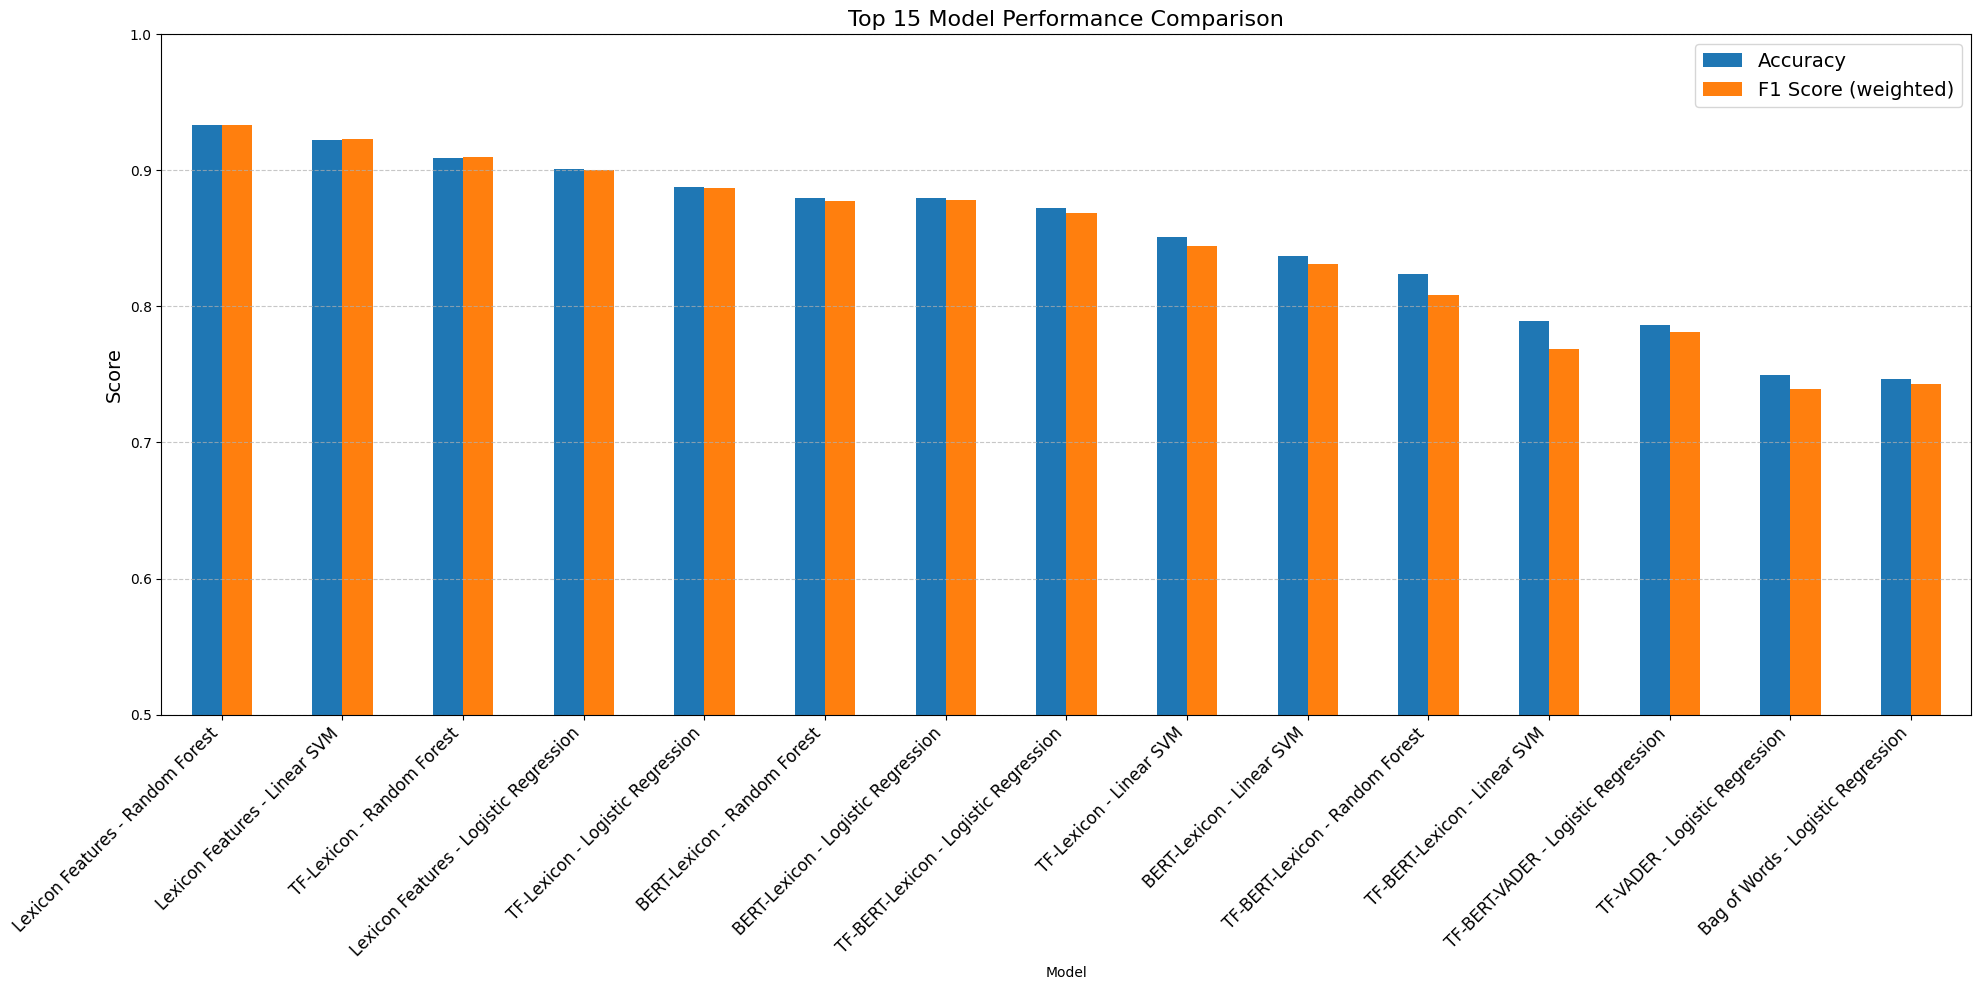

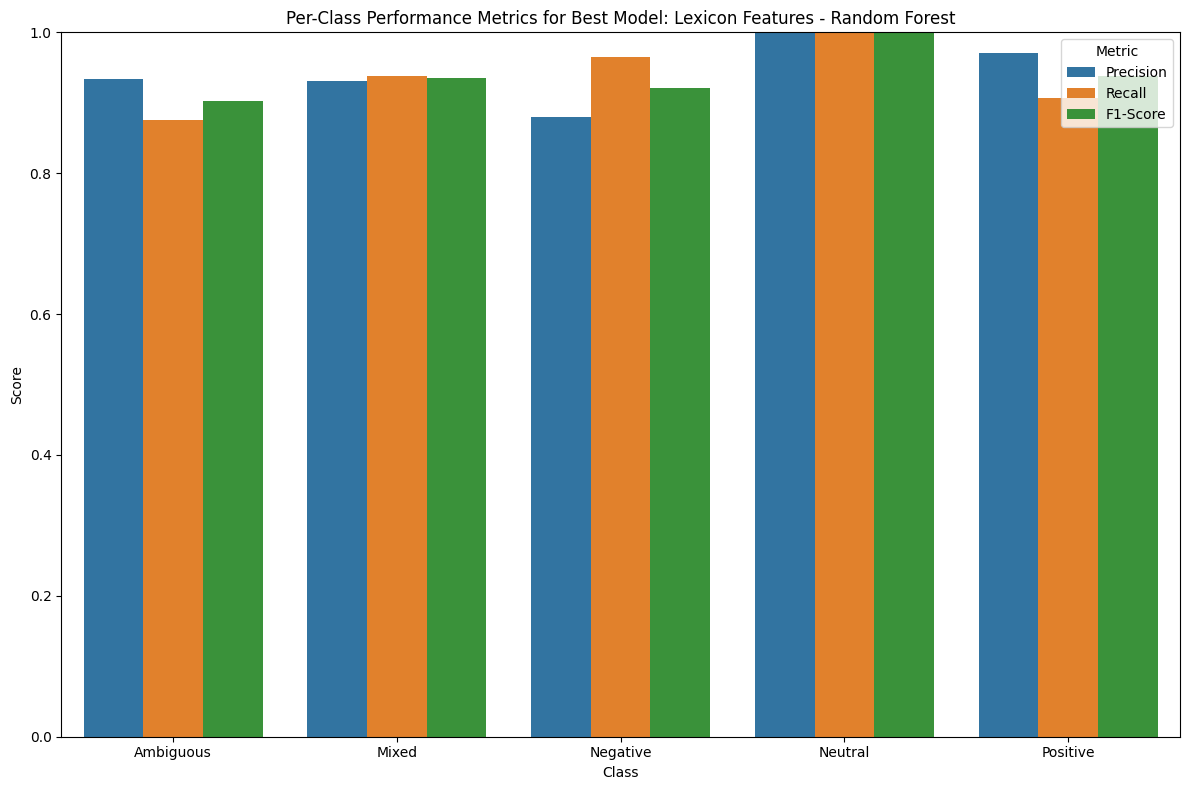


----- Feature Combination Analysis -----
Best in Traditional group: Bag of Words - Logistic Regression
  Accuracy: 0.7467
  F1 Score: 0.7427
Best in Embedding-based group: Sentence Embeddings - Linear SVM
  Accuracy: 0.7253
  F1 Score: 0.7065
Best in Lexicon-based group: Lexicon Features - Random Forest
  Accuracy: 0.9333
  F1 Score: 0.9334
Best in Sentiment Lexicon group: TF-BERT-VADER - Logistic Regression
  Accuracy: 0.7867
  F1 Score: 0.7810
Best in Combined Features group: TF-BERT-Lexicon - Logistic Regression
  Accuracy: 0.8720
  F1 Score: 0.8687


<Figure size 2000x1200 with 0 Axes>

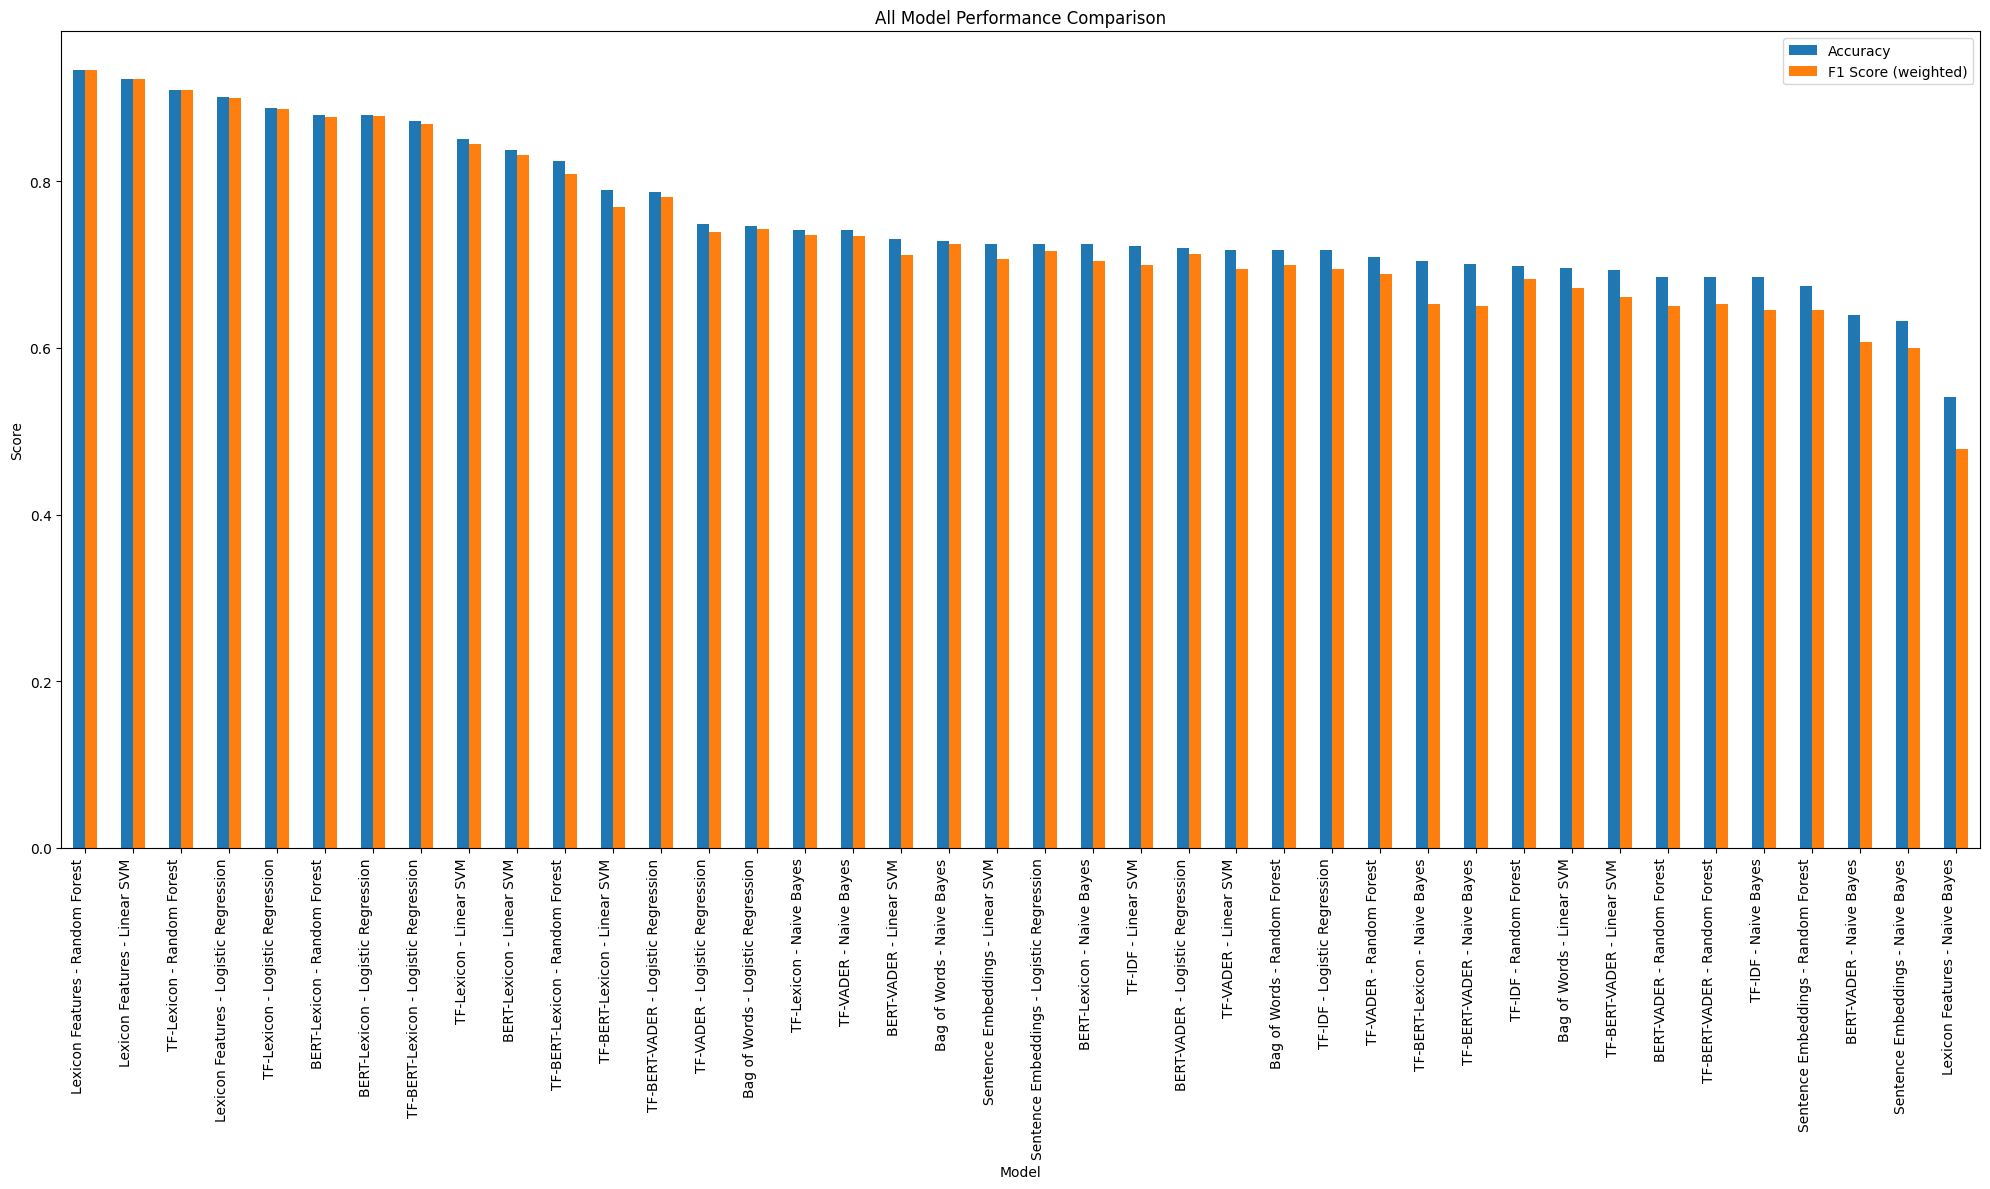


Analysis Complete! Check the generated plots and saved files.


In [4]:
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0),
    'Linear SVM': SVC(C=1.0, max_iter=10000),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# train test splits

X_tfidf_train, X_tfidf_test, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_bow_train, X_bow_test, y_train_bow, y_test_bow = train_test_split(
    X_bow, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_allminipro_train, X_allminipro_test, y_train_allminipro, y_test_allminipro = train_test_split(
    allminipro, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_tf_lexi_train, X_tf_lexi_test, y_train_tf_lexi, y_test_tf_lexi = train_test_split(
    tf_lexi, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_tf_vader_train, X_tf_vader_test, y_train_tf_vader, y_test_tf_vader = train_test_split(
    tf_vader_file, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_bert_vader_train, X_bert_vader_test, y_train_bert_vader, y_test_bert_vader = train_test_split(
    bert_vader_file, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_bert_lexi_train, X_bert_lexi_test, y_train_bert_lexi, y_test_bert_lexi = train_test_split(
    bert_lexi, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_tf_bert_vader_train, X_tf_bert_vader_test, y_train_tf_bert_vader, y_test_tf_bert_vader = train_test_split(
    tf_bert_vader_file, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_tf_bert_lexi_train, X_tf_bert_lexi_test, y_train_tf_bert_lexi, y_test_tf_bert_lexi = train_test_split(
    tf_bert_lexi, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_lexicon_train, X_lexicon_test, y_train_lexicon, y_test_lexicon = train_test_split(
    lexicon_features, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

def evaluate_models(X_train, X_test, y_train, y_test, models, feature_name):
    results = {}
    print(f"\n----- Training ({feature_name}) -----")
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Store model performance
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = {
            'accuracy': report['accuracy'],
            'weighted_f1': report['weighted avg']['f1-score'],
            'model': model
        }
        
        # Print classification report
        
        # Create and display confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=sorted(y_test.unique()), 
                    yticklabels=sorted(y_test.unique()))
        plt.title(f'Confusion Matrix: {feature_name} - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.close()
    
    return results

#  Evaluate All Feature Types
tfidf_results = evaluate_models(X_tfidf_train, X_tfidf_test, y_train_tfidf, y_test_tfidf, models, "TF-IDF")
bow_results = evaluate_models(X_bow_train, X_bow_test, y_train_bow, y_test_bow, models, "Bag of Words")
allminipro_results = evaluate_models(X_allminipro_train, X_allminipro_test, y_train_allminipro, y_test_allminipro, models, "Sentence Embeddings")
tf_lexi_results = evaluate_models(X_tf_lexi_train, X_tf_lexi_test, y_train_tf_lexi, y_test_tf_lexi, models, "TF-Lexicon")
tf_vader_results = evaluate_models(X_tf_vader_train, X_tf_vader_test, y_train_tf_vader, y_test_tf_vader, models, "TF-VADER")
bert_vader_results = evaluate_models(X_bert_vader_train, X_bert_vader_test, y_train_bert_vader, y_test_bert_vader, models, "BERT-VADER")
bert_lexi_results = evaluate_models(X_bert_lexi_train, X_bert_lexi_test, y_train_bert_lexi, y_test_bert_lexi, models, "BERT-Lexicon")
tf_bert_vader_results = evaluate_models(X_tf_bert_vader_train, X_tf_bert_vader_test, y_train_tf_bert_vader, y_test_tf_bert_vader, models, "TF-BERT-VADER")
tf_bert_lexi_results = evaluate_models(X_tf_bert_lexi_train, X_tf_bert_lexi_test, y_train_tf_bert_lexi, y_test_tf_bert_lexi, models, "TF-BERT-Lexicon")
lexicon_results = evaluate_models(X_lexicon_train, X_lexicon_test, y_train_lexicon, y_test_lexicon, models, "Lexicon Features")

#  Combine All Results for Comparison
all_results = {}
feature_names = [
    "TF-IDF", "Bag of Words", "Sentence Embeddings", 
    "TF-Lexicon", "TF-VADER", "BERT-VADER", "BERT-Lexicon",
    "TF-BERT-VADER", "TF-BERT-Lexicon", "Lexicon Features"
]
result_sets = [
    tfidf_results, bow_results, allminipro_results, 
    tf_lexi_results, tf_vader_results, bert_vader_results, 
    bert_lexi_results, tf_bert_vader_results, 
    tf_bert_lexi_results, lexicon_results
]

for feature_name, results in zip(feature_names, result_sets):
    for model_name, metrics in results.items():
        key = f"{feature_name} - {model_name}"
        all_results[key] = metrics

#  Create Comparison Table
comparison_df = pd.DataFrame({
    'Model': [k for k in all_results.keys()],
    'Accuracy': [v['accuracy'] for v in all_results.values()],
    'F1 Score (weighted)': [v['weighted_f1'] for v in all_results.values()]
})

#  Sort by Accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

#  Display and Save Comparison Results
print("\n----- Overall Model Comparison -----")
print(comparison_df)
comparison_df.to_csv('sentiment_model_comparison_advanced.csv', index=False)

#  Plot Comparison Bar Chart
plt.figure(figsize=(20, 10))
ax = comparison_df.head(15).plot(x='Model', y=['Accuracy', 'F1 Score (weighted)'], kind='bar', figsize=(20, 10))
plt.title('Top 15 Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.ylim(0.5, 1.0)  # Set y-axis limits from 0.5 to 1.0 to better see differences
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])  # Explicitly set y-tick marks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=14)
plt.tight_layout()

#  Find the Best Model
best_model_row = comparison_df.iloc[0]
print(f"\nBest performing model: {best_model_row['Model']}")
print(f"Accuracy: {best_model_row['Accuracy']:.4f}")
print(f"F1 Score: {best_model_row['F1 Score (weighted)']:.4f}")

#  Save the best model
feature_type, model_type = best_model_row['Model'].split(' - ')
best_model = None

# Mapping of feature types to their corresponding results
feature_results_map = {
    "TF-IDF": tfidf_results,
    "Bag of Words": bow_results,
    "Sentence Embeddings": allminipro_results,
    "TF-Lexicon": tf_lexi_results,
    "TF-VADER": tf_vader_results,
    "BERT-VADER": bert_vader_results,
    "BERT-Lexicon": bert_lexi_results,
    "TF-BERT-VADER": tf_bert_vader_results,
    "TF-BERT-Lexicon": tf_bert_lexi_results,
    "Lexicon Features": lexicon_results
}

if feature_type in feature_results_map:
    best_model = feature_results_map[feature_type][model_type]['model']

if best_model:
    # Save the model
    joblib.dump(best_model, 'best_sentiment_model.pkl')
    print(f"Best model saved as 'best_sentiment_model.pkl'")
    
    # Save feature type and preprocessing info
    model_info = {
        'feature_type': feature_type,
        'model_type': model_type,
        'accuracy': best_model_row['Accuracy'],
        'f1_score': best_model_row['F1 Score (weighted)']
    }
    
    with open('best_model_info.joblib', 'wb') as f:
        joblib.dump(model_info, f)
    
    # Determine which test set to use based on the best model's feature type
    test_set_map = {
        "TF-IDF": (X_tfidf_test, y_test_tfidf),
        "Bag of Words": (X_bow_test, y_test_bow),
        "Sentence Embeddings": (X_allminipro_test, y_test_allminipro),
        "TF-Lexicon": (X_tf_lexi_test, y_test_tf_lexi),
        "TF-VADER": (X_tf_vader_test, y_test_tf_vader),
        "BERT-VADER": (X_bert_vader_test, y_test_bert_vader),
        "BERT-Lexicon": (X_bert_lexi_test, y_test_bert_lexi),
        "TF-BERT-VADER": (X_tf_bert_vader_test, y_test_tf_bert_vader),
        "TF-BERT-Lexicon": (X_tf_bert_lexi_test, y_test_tf_bert_lexi),
        "Lexicon Features": (X_lexicon_test, y_test_lexicon)
    }
    
    X_test, y_test = test_set_map.get(feature_type, (None, None))
    
    # Create a detailed visualization of model performance
    if X_test is not None:
        # Predict on the test set
        y_pred = best_model.predict(X_test)
        
        # Get detailed classification report
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Extract class metrics
        class_metrics = {}
        for class_name, metrics in report.items():
            if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
                class_metrics[class_name] = {
                    'precision': metrics['precision'],
                    'recall': metrics['recall'],
                    'f1-score': metrics['f1-score']
                }
        
        # Create a DataFrame of class metrics
        class_df = pd.DataFrame(class_metrics).T.reset_index()
        class_df.columns = ['Class', 'Precision', 'Recall', 'F1-Score']
        
        # Visualization of per-class metrics
        plt.figure(figsize=(12, 8))
        class_df_melted = pd.melt(class_df, id_vars=['Class'], var_name='Metric', value_name='Score')
        sns.barplot(x='Class', y='Score', hue='Metric', data=class_df_melted)
        plt.title(f'Per-Class Performance Metrics for Best Model: {best_model_row["Model"]}')
        plt.ylim(0, 1.0)
        plt.tight_layout()
        plt.show()

#  Feature combination analysis
print("\n----- Feature Combination Analysis -----")
feature_groups = {
    'Traditional': ["TF-IDF", "Bag of Words"],
    'Embedding-based': ["Sentence Embeddings"],
    'Lexicon-based': ["TF-Lexicon", "BERT-Lexicon", "Lexicon Features"],
    'Sentiment Lexicon': ["TF-VADER", "BERT-VADER"],
    'Combined Features': ["TF-BERT-VADER", "TF-BERT-Lexicon"]
}

for group_name, features in feature_groups.items():
    group_models = [model for model in comparison_df['Model'].values if any(feature in model for feature in features)]
    if group_models:
        best_in_group = comparison_df[comparison_df['Model'].isin(group_models)].iloc[0]
        print(f"Best in {group_name} group: {best_in_group['Model']}")
        print(f"  Accuracy: {best_in_group['Accuracy']:.4f}")
        print(f"  F1 Score: {best_in_group['F1 Score (weighted)']:.4f}")

#  Comprehensive visualization of all model performances
plt.figure(figsize=(20, 12))
comparison_df.plot(x='Model', y=['Accuracy', 'F1 Score (weighted)'], kind='bar', figsize=(20, 12))
plt.title('All Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


print("\nAnalysis Complete! Check the generated plots and saved files.")

# Let's save the best model without using our own embeddings

In [5]:
X_tf_bert_vader_train, X_tf_bert_vader_test, y_train_tf_bert_vader, y_test_tf_bert_vader = train_test_split(
    tf_bert_vader_file, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

# Create and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_tf_bert_vader_train, y_train_tf_bert_vader)

y_pred = lr_model.predict(X_tf_bert_vader_test)
accuracy = lr_model.score(X_tf_bert_vader_test, y_test_tf_bert_vader)
print(f"Logistic Regression accuracy: {accuracy:.4f}")

joblib.dump(lr_model, 'vadermodel.pkl')
print("Model saved as 'vadermodel.pkl'")

Logistic Regression accuracy: 0.7867
Model saved as 'vadermodel.pkl'


# Experiment - Feature smoting
## What it does:

- Smotes on the feature space (creating synthetic data(features) for the underrepresentated sentiments)

- It's not generating new text

- It's still testing on original data


--- Original Data ---

Original Data - Classification Report:
              precision    recall  f1-score   support

   Ambiguous       1.00      0.66      0.79        32
       Mixed       0.89      0.91      0.90       130
    Negative       0.83      0.98      0.90        84
     Neutral       1.00      0.86      0.92        21
    Positive       0.95      0.92      0.93       108

    accuracy                           0.90       375
   macro avg       0.93      0.86      0.89       375
weighted avg       0.91      0.90      0.90       375



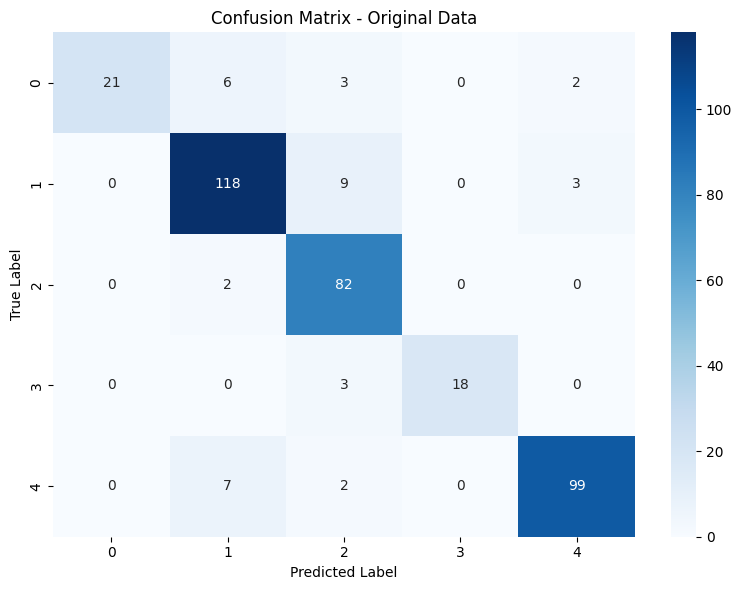


Training Data Class Distribution:
{'Ambiguous': 126, 'Mixed': 522, 'Negative': 335, 'Neutral': 82, 'Positive': 434}

--- SMOTE Resampled Data ---

SMOTE Resampled Data - Classification Report:
              precision    recall  f1-score   support

   Ambiguous       0.94      0.91      0.92        32
       Mixed       0.94      0.90      0.92       130
    Negative       0.84      0.96      0.90        84
     Neutral       1.00      0.95      0.98        21
    Positive       0.97      0.92      0.94       108

    accuracy                           0.92       375
   macro avg       0.94      0.93      0.93       375
weighted avg       0.93      0.92      0.92       375



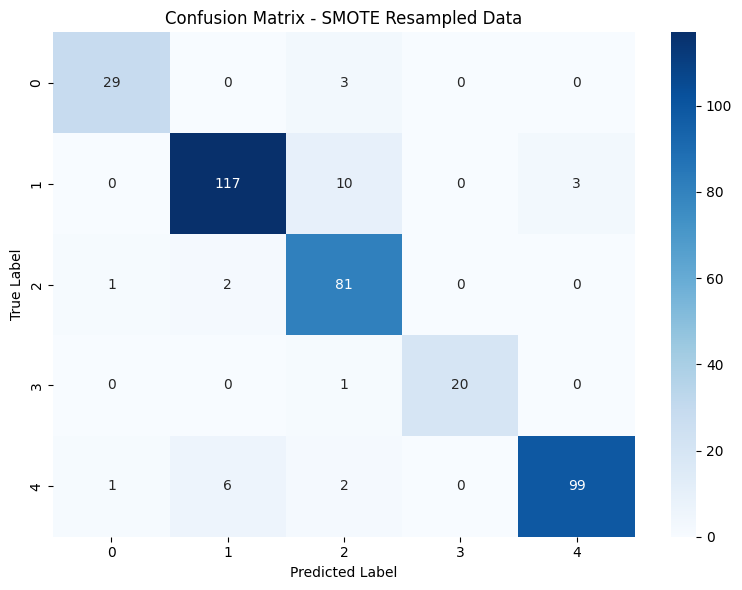


Training Data Class Distribution:
{'Ambiguous': 522, 'Mixed': 522, 'Negative': 522, 'Neutral': 522, 'Positive': 522}

--- Comparative Analysis ---
Original Data Accuracy: 0.9013333333333333
SMOTE Data Accuracy: 0.9226666666666666

Original Data Weighted F1: 0.9001165637306199
SMOTE Data Weighted F1: 0.9233416849492945


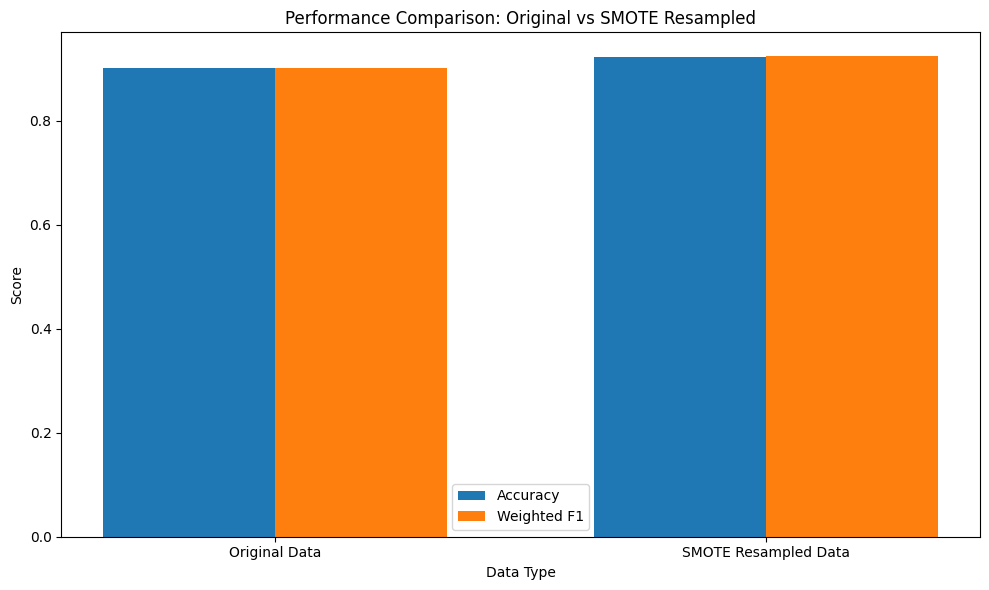

In [6]:
from imblearn.over_sampling import SMOTE

# Convert combined_vader_bert to numpy array if needed
X = lexicon_features

# Function to train, predict, and visualize
def evaluate_model(X, y, apply_smote=False, title="Model"):
    # Split data first
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=420, stratify=y
    )
    
    # Apply SMOTE only to training data if specified
    if apply_smote:
        smote = SMOTE(random_state=420)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Train Logistic Regression
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    
    # Predict
    y_pred = lr.predict(X_test)
    
    # Classification Report
    print(f"\n{title} - Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    
    # Class distribution before and after
    print("\nTraining Data Class Distribution:")
    unique, counts = np.unique(y_train, return_counts=True)
    print(dict(zip(unique, counts)))
    
    return lr, y_pred, y_test

# Evaluate original data
print("\n--- Original Data ---")
original_model, original_pred, original_test = evaluate_model(
    X, y_sentiment, apply_smote=False, title="Original Data"
)

# Evaluate SMOTE-resampled data
print("\n--- SMOTE Resampled Data ---")
smote_model, smote_pred, smote_test = evaluate_model(
    X, y_sentiment, apply_smote=True, title="SMOTE Resampled Data"
)

# Comparative Analysis
from sklearn.metrics import accuracy_score, f1_score

print("\n--- Comparative Analysis ---")
print("Original Data Accuracy:", accuracy_score(original_test, original_pred))
print("SMOTE Data Accuracy:", accuracy_score(smote_test, smote_pred))
print("\nOriginal Data Weighted F1:", f1_score(original_test, original_pred, average='weighted'))
print("SMOTE Data Weighted F1:", f1_score(smote_test, smote_pred, average='weighted'))

# Visualize performance comparison
plt.figure(figsize=(10, 6))
data_types = ['Original Data', 'SMOTE Resampled Data']
accuracies = [
    accuracy_score(original_test, original_pred),
    accuracy_score(smote_test, smote_pred)
]
f1_scores = [
    f1_score(original_test, original_pred, average='weighted'),
    f1_score(smote_test, smote_pred, average='weighted')
]

x = np.arange(len(data_types))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='Weighted F1')

plt.xlabel('Data Type')
plt.ylabel('Score')
plt.title('Performance Comparison: Original vs SMOTE Resampled')
plt.xticks(x, data_types)
plt.legend()
plt.tight_layout()
plt.show()

# Hyperparameter tuning of models with the feature TF-IDF and sentiment lexicon


----- Fine-tuning Sentiment Classifier with tf_lexi features -----

Original model: TF-Lexicon - Logistic Regression
Accuracy: 0.8880
F1 Score: 0.8868

Original model: TF-Lexicon - Linear SVM
Accuracy: 0.8507
F1 Score: 0.8445

Original model: TF-Lexicon - Naive Bayes
Accuracy: 0.7413
F1 Score: 0.7360

Original model: TF-Lexicon - Random Forest
Accuracy: 0.9093
F1 Score: 0.9099
Training features shape: (1499, 3274)
Training labels distribution: sentiment
Mixed        522
Positive     434
Negative     335
Ambiguous    126
Neutral       82
Name: count, dtype: int64

Training Logistic Regression with TF-Lexicon-Tuned...
TF-Lexicon-Tuned - Logistic Regression - Accuracy: 0.8880, F1: 0.8881
Best parameters: {'C': 1.5, 'class_weight': {'Ambiguous': 2.3721518987341774, 'Mixed': 0.5748466257668712, 'Negative': 0.894510739856802, 'Neutral': 3.6388349514563108, 'Positive': 0.6915129151291513}, 'solver': 'lbfgs'}

Training SVM with TF-Lexicon-Tuned...
TF-Lexicon-Tuned - SVM - Accuracy: 0.8747, F1

<Figure size 1400x1000 with 0 Axes>

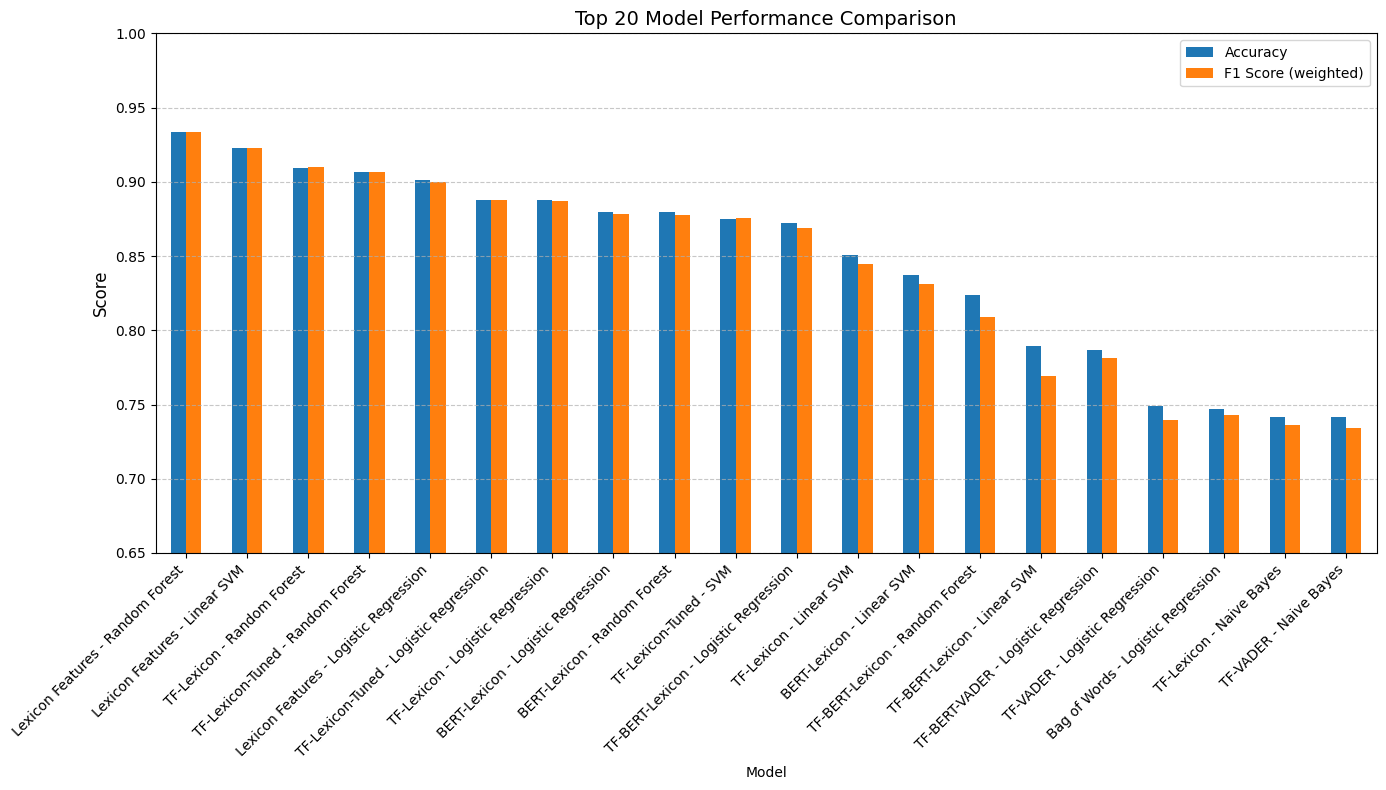


Overall best model: Lexicon Features - Random Forest
Accuracy: 0.9333
F1 Score: 0.9334
Best overall model saved as 'best_sentiment_model.pkl'


In [7]:
print("\n----- Fine-tuning Sentiment Classifier with tf_lexi features -----")

def train_sentiment_classifier(X_train, X_test, y_train, y_test, model_name="Fine-tuned"):
    # Compute class weights
    class_weights = compute_class_weight(
        class_weight='balanced', 
        classes=np.unique(y_sentiment), 
        y=y_sentiment
    )

    # Convert to dictionary for sklearn
    class_weight_dict = dict(zip(np.unique(y_sentiment), class_weights))

    # Define more sophisticated models and hyperparameter grids
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'C': [0.1, 1.0, 1.5, 2, 2.5, 3],
                'solver': ['liblinear', 'saga', 'lbfgs'],
                'class_weight': [None, class_weight_dict]
            }
        },
        'SVM': {
            'model': SVC(probability=True),
            'params': {
                'C': [0.1, 1.0, 1.5, 2, 2.5, 3],
                'kernel': ['linear', 'rbf'],
                'class_weight': [None, class_weight_dict]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(random_state=420),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 20],
                'min_samples_split': [2, 10],
                'min_samples_leaf': [1, 2, 4],
                'class_weight': [None, class_weight_dict],
                'criterion': ['gini', 'entropy']
            }
        }
    }
    
    results = {}
    best_accuracy = 0
    best_model = None
    best_model_name = None
    
    # Print training dataset shape
    print(f"Training features shape: {X_train.shape}")
    print(f"Training labels distribution: {pd.Series(y_train).value_counts()}")
    
    # Train and evaluate each model
    for clf_name, clf_info in models.items():
        print(f"\nTraining {clf_name} with {model_name}...")
        
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        # Set up GridSearchCV
        grid_search = GridSearchCV(
            estimator=clf_info['model'],
            param_grid=clf_info['params'],
            cv=cv,  # Use 3-fold instead of default 5-fold
            n_jobs=-1,  # Use all available cores
            scoring='f1_weighted',
            verbose=0  # Reduce verbosity
        )
        
        grid_search.fit(X_train, y_train)
        
        # Get best model
        model = grid_search.best_estimator_
        
        # Predict on test set
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Store model performance
        full_name = f"{model_name} - {clf_name}"
        results[full_name] = {
            'model': model,
            'accuracy': accuracy,
            'best_params': grid_search.best_params_,
            'weighted_f1': weighted_f1
        }
        
        # Print concise results
        print(f"{full_name} - Accuracy: {accuracy:.4f}, F1: {weighted_f1:.4f}")
        print(f"Best parameters: {grid_search.best_params_}")
        
        # Create confusion matrix but don't display it
        cm = confusion_matrix(y_test, y_pred)
        
        # Update best model if needed
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_model_name = full_name
    
    # Print summary of best model
    print(f"\nBest model from {model_name}: {best_model_name}")
    print(f"Accuracy: {best_accuracy:.4f}")
    print(f"F1 Score: {results[best_model_name]['weighted_f1']:.4f}")
    
    return results, best_model, best_model_name

# Train and evaluate with tf_lexi features
X_tf_lexi_train, X_tf_lexi_test, y_train, y_test = train_test_split(
    tf_lexi, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

# Find the original tf_lexi model performance (without fine-tuning)
original_tf_lexi_performance = None
for model_name, metrics in all_results.items():
    if "TF-Lexicon" in model_name:
        print(f"\nOriginal model: {model_name}")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"F1 Score: {metrics['weighted_f1']:.4f}")
        
        if original_tf_lexi_performance is None or metrics['accuracy'] > original_tf_lexi_performance['accuracy']:
            original_tf_lexi_performance = {
                'model_name': model_name,
                'accuracy': metrics['accuracy'],
                'weighted_f1': metrics['weighted_f1']
            }

# Run fine-tuning on tf_lexi features
results_tuning, best_tuned_model, best_tuned_model_name = train_sentiment_classifier(
    X_tf_lexi_train, 
    X_tf_lexi_test, 
    y_train, 
    y_test,
    "TF-Lexicon-Tuned"
)

# Calculate improvement
if original_tf_lexi_performance:
    best_tuned_accuracy = results_tuning[best_tuned_model_name]['accuracy']
    best_tuned_f1 = results_tuning[best_tuned_model_name]['weighted_f1']
    
    accuracy_improvement = (best_tuned_accuracy - original_tf_lexi_performance['accuracy']) / original_tf_lexi_performance['accuracy'] * 100
    f1_improvement = (best_tuned_f1 - original_tf_lexi_performance['weighted_f1']) / original_tf_lexi_performance['weighted_f1'] * 100
    
    print("\n----- Improvement with Fine-tuning -----")
    print(f"Best original TF-Lexicon model: {original_tf_lexi_performance['model_name']}")
    print(f"Accuracy: {original_tf_lexi_performance['accuracy']:.4f}")
    print(f"F1 Score: {original_tf_lexi_performance['weighted_f1']:.4f}")
    
    print(f"\nBest fine-tuned TF-Lexicon model: {best_tuned_model_name}")
    print(f"Accuracy: {best_tuned_accuracy:.4f}")
    print(f"F1 Score: {best_tuned_f1:.4f}")
    
    print(f"\nAccuracy improvement: {accuracy_improvement:.2f}%")
    print(f"F1 Score improvement: {f1_improvement:.2f}%")

# Add fine-tuned results to the overall comparison
for model_name, metrics in results_tuning.items():
    all_results[model_name] = {
        'accuracy': metrics['accuracy'],
        'weighted_f1': metrics['weighted_f1'],
        'model': metrics['model']
    }

# Create updated comparison table
updated_comparison_df = pd.DataFrame({
    'Model': [k for k in all_results.keys()],
    'Accuracy': [v['accuracy'] for v in all_results.values()],
    'F1 Score (weighted)': [v['weighted_f1'] for v in all_results.values()]
})

# Sort by Accuracy
updated_comparison_df = updated_comparison_df.sort_values('Accuracy', ascending=False)

# Display and save updated comparison
print("\n----- Updated Model Comparison with Fine-tuning -----")
print(updated_comparison_df.head(10))
updated_comparison_df.to_csv('sentiment_model_comparison_with_tuning.csv', index=False)

# Plot updated comparison for top 10 models
plt.figure(figsize=(14, 10))
updated_comparison_df.head(20).plot(
    x='Model', 
    y=['Accuracy', 'F1 Score (weighted)'], 
    kind='bar', 
    figsize=(14, 8)
)
plt.title('Top 20 Model Performance Comparison', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0.65, 1.0)  # Better see differences in high-performing models
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_models_comparison_with_tuning.png', dpi=300, bbox_inches='tight')
plt.show()

# Find overall best model
overall_best_model_name = updated_comparison_df.iloc[0]['Model']
overall_best_accuracy = updated_comparison_df.iloc[0]['Accuracy']
overall_best_f1 = updated_comparison_df.iloc[0]['F1 Score (weighted)']

print(f"\nOverall best model: {overall_best_model_name}")
print(f"Accuracy: {overall_best_accuracy:.4f}")
print(f"F1 Score: {overall_best_f1:.4f}")

# Save the overall best model
if overall_best_model_name in results_tuning:
    # If the best model is from our fine-tuning
    best_model = results_tuning[overall_best_model_name]['model']
    joblib.dump(best_model, 'best_sentiment_model.pkl')
    
    # Save model info
    model_info = {
        'model_name': overall_best_model_name,
        'accuracy': overall_best_accuracy,
        'f1_score': overall_best_f1,
        'feature_type': 'TF-Lexicon',
        'is_tuned': True
    }
else:
    # If the best model is from the original evaluation
    for feature_name, results in feature_results_map.items():
        model_part = overall_best_model_name.split(' - ')[1] if ' - ' in overall_best_model_name else None
        if model_part and model_part in results:
            best_model = results[model_part]['model']
            joblib.dump(best_model, 'best_sentiment_model.pkl')
            
            # Save model info
            model_info = {
                'model_name': overall_best_model_name,
                'accuracy': overall_best_accuracy,
                'f1_score': overall_best_f1,
                'feature_type': feature_name,
                'is_tuned': False
            }
            break

# Save model info
with open('best_sentiment_model_info.joblib', 'wb') as f:
    joblib.dump(model_info, f)

print(f"Best overall model saved as 'best_sentiment_model.pkl'")

# Hyperparameter tuning of the models that use TF-IDF, BERT and Vader sentiment lexicon combined


----- Fine-tuning Sentiment Classifier with tf_bert_vader features -----

Original model: TF-BERT-VADER - Logistic Regression
Accuracy: 0.7867
F1 Score: 0.7810

Original model: TF-BERT-VADER - Linear SVM
Accuracy: 0.6933
F1 Score: 0.6609

Original model: TF-BERT-VADER - Naive Bayes
Accuracy: 0.7013
F1 Score: 0.6504

Original model: TF-BERT-VADER - Random Forest
Accuracy: 0.6853
F1 Score: 0.6528
Training features shape: (1499, 3657)
Training labels distribution: sentiment
Mixed        522
Positive     434
Negative     335
Ambiguous    126
Neutral       82
Name: count, dtype: int64

Training Logistic Regression with TF-BERT-VADER-Tuned...
TF-BERT-VADER-Tuned - Logistic Regression - Accuracy: 0.7840, F1: 0.7818
Best parameters: {'C': 1.0, 'class_weight': {'Ambiguous': 2.3721518987341774, 'Mixed': 0.5748466257668712, 'Negative': 0.894510739856802, 'Neutral': 3.6388349514563108, 'Positive': 0.6915129151291513}, 'solver': 'saga'}

Training SVM with TF-BERT-VADER-Tuned...
TF-BERT-VADER-Tuned

<Figure size 1400x1000 with 0 Axes>

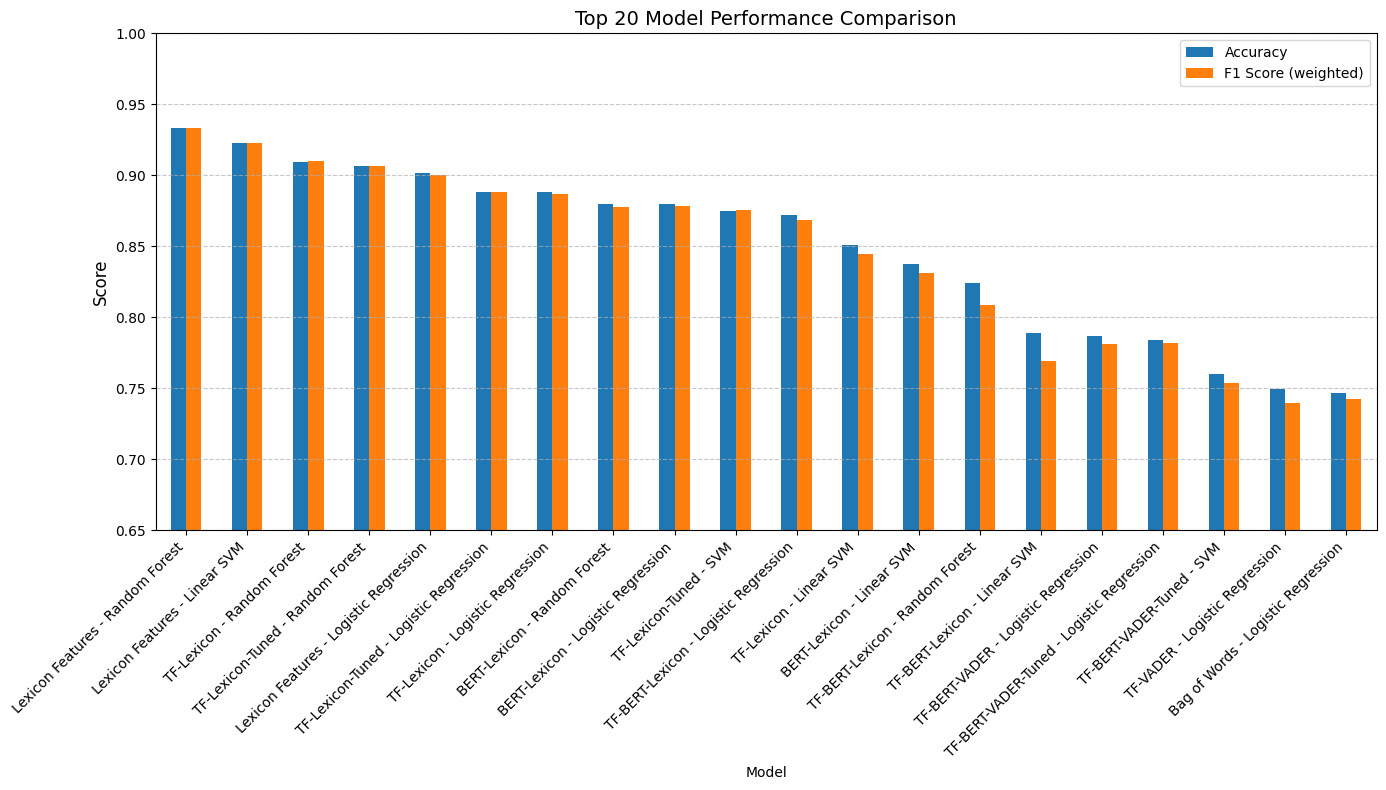


Overall best model: Lexicon Features - Random Forest
Accuracy: 0.9333
F1 Score: 0.9334
Best TF-BERT-VADER model saved as 'vadermodel.pkl'


In [8]:
print("\n----- Fine-tuning Sentiment Classifier with tf_bert_vader features -----")

def train_sentiment_classifier(X_train, X_test, y_train, y_test, model_name="Fine-tuned"):
    # Compute class weights
    class_weights = compute_class_weight(
        class_weight='balanced', 
        classes=np.unique(y_sentiment), 
        y=y_sentiment
    )

    # Convert to dictionary for sklearn
    class_weight_dict = dict(zip(np.unique(y_sentiment), class_weights))

    # Define more sophisticated models and hyperparameter grids
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'C': [0.1, 1.0, 1.5, 2, 2.5, 3],
                'solver': ['liblinear', 'saga', 'lbfgs'],
                'class_weight': [None, class_weight_dict]
            }
        },
        'SVM': {
            'model': SVC(probability=True),
            'params': {
                'C': [0.1, 1.0, 1.5, 2, 2.5, 3],
                'kernel': ['linear', 'rbf'],
                'class_weight': [None, class_weight_dict]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(random_state=420),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 20],
                'min_samples_split': [2, 10],
                'min_samples_leaf': [1, 2, 4],
                'class_weight': [None, class_weight_dict],
                'criterion': ['gini', 'entropy']
            }
        }
    }
    
    results = {}
    best_accuracy = 0
    best_model = None
    best_model_name = None
    
    # Print training dataset shape
    print(f"Training features shape: {X_train.shape}")
    print(f"Training labels distribution: {pd.Series(y_train).value_counts()}")
    
    # Train and evaluate each model
    for clf_name, clf_info in models.items():
        print(f"\nTraining {clf_name} with {model_name}...")
        
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        # Set up GridSearchCV
        grid_search = GridSearchCV(
            estimator=clf_info['model'],
            param_grid=clf_info['params'],
            cv=cv,  # Use 3-fold instead of default 5-fold
            n_jobs=-1,  # Use all available cores
            scoring='f1_weighted',
            verbose=0  # Reduce verbosity
        )
        
        grid_search.fit(X_train, y_train)
        
        # Get best model
        model = grid_search.best_estimator_
        
        # Predict on test set
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Store model performance
        full_name = f"{model_name} - {clf_name}"
        results[full_name] = {
            'model': model,
            'accuracy': accuracy,
            'best_params': grid_search.best_params_,
            'weighted_f1': weighted_f1
        }
        
        # Print concise results
        print(f"{full_name} - Accuracy: {accuracy:.4f}, F1: {weighted_f1:.4f}")
        print(f"Best parameters: {grid_search.best_params_}")
        
        # Create confusion matrix but don't display it
        cm = confusion_matrix(y_test, y_pred)
        
        # Update best model if needed
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_model_name = full_name
    
    # Print summary of best model
    print(f"\nBest model from {model_name}: {best_model_name}")
    print(f"Accuracy: {best_accuracy:.4f}")
    print(f"F1 Score: {results[best_model_name]['weighted_f1']:.4f}")
    
    return results, best_model, best_model_name

# Train and evaluate with tf_bert_vader features
X_tf_bert_vader_train, X_tf_bert_vader_test, y_train, y_test = train_test_split(
    tf_bert_vader_file, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

# Find the original tf_bert_vader model performance (without fine-tuning)
original_tf_bert_vader_performance = None
for model_name, metrics in all_results.items():
    if "TF-BERT-VADER" in model_name:
        print(f"\nOriginal model: {model_name}")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"F1 Score: {metrics['weighted_f1']:.4f}")
        
        if original_tf_bert_vader_performance is None or metrics['accuracy'] > original_tf_bert_vader_performance['accuracy']:
            original_tf_bert_vader_performance = {
                'model_name': model_name,
                'accuracy': metrics['accuracy'],
                'weighted_f1': metrics['weighted_f1']
            }

# Run fine-tuning on tf_bert_vader features
results_tuning, best_tuned_model, best_tuned_model_name = train_sentiment_classifier(
    X_tf_bert_vader_train, 
    X_tf_bert_vader_test, 
    y_train, 
    y_test,
    "TF-BERT-VADER-Tuned"
)

# Calculate improvement
if original_tf_bert_vader_performance:
    best_tuned_accuracy = results_tuning[best_tuned_model_name]['accuracy']
    best_tuned_f1 = results_tuning[best_tuned_model_name]['weighted_f1']
    
    accuracy_improvement = (best_tuned_accuracy - original_tf_bert_vader_performance['accuracy']) / original_tf_bert_vader_performance['accuracy'] * 100
    f1_improvement = (best_tuned_f1 - original_tf_bert_vader_performance['weighted_f1']) / original_tf_bert_vader_performance['weighted_f1'] * 100
    
    print("\n----- Improvement with Fine-tuning -----")
    print(f"Best original TF-BERT-VADER model: {original_tf_bert_vader_performance['model_name']}")
    print(f"Accuracy: {original_tf_bert_vader_performance['accuracy']:.4f}")
    print(f"F1 Score: {original_tf_bert_vader_performance['weighted_f1']:.4f}")
    
    print(f"\nBest fine-tuned TF-BERT-VADER model: {best_tuned_model_name}")
    print(f"Accuracy: {best_tuned_accuracy:.4f}")
    print(f"F1 Score: {best_tuned_f1:.4f}")
    
    print(f"\nAccuracy improvement: {accuracy_improvement:.2f}%")
    print(f"F1 Score improvement: {f1_improvement:.2f}%")

# Add fine-tuned results to the overall comparison
for model_name, metrics in results_tuning.items():
    all_results[model_name] = {
        'accuracy': metrics['accuracy'],
        'weighted_f1': metrics['weighted_f1'],
        'model': metrics['model']
    }

# Create updated comparison table
updated_comparison_df = pd.DataFrame({
    'Model': [k for k in all_results.keys()],
    'Accuracy': [v['accuracy'] for v in all_results.values()],
    'F1 Score (weighted)': [v['weighted_f1'] for v in all_results.values()]
})

# Sort by Accuracy
updated_comparison_df = updated_comparison_df.sort_values('Accuracy', ascending=False)

# Display and save updated comparison
print("\n----- Updated Model Comparison with Fine-tuning -----")
print(updated_comparison_df.head(10))
updated_comparison_df.to_csv('sentiment_model_comparison_with_tuning.csv', index=False)

# Plot updated comparison for top 10 models
plt.figure(figsize=(14, 10))
updated_comparison_df.head(20).plot(
    x='Model', 
    y=['Accuracy', 'F1 Score (weighted)'], 
    kind='bar', 
    figsize=(14, 8)
)
plt.title('Top 20 Model Performance Comparison', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0.65, 1.0)  # Better see differences in high-performing models
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_models_comparison_with_tuning.png', dpi=300, bbox_inches='tight')
plt.show()

# Find overall best model
overall_best_model_name = updated_comparison_df.iloc[0]['Model']
overall_best_accuracy = updated_comparison_df.iloc[0]['Accuracy']
overall_best_f1 = updated_comparison_df.iloc[0]['F1 Score (weighted)']

print(f"\nOverall best model: {overall_best_model_name}")
print(f"Accuracy: {overall_best_accuracy:.4f}")
print(f"F1 Score: {overall_best_f1:.4f}")

# Save the best tf_bert_vader model as vadermodel.pkl
# Instead of checking if it's the overall best, we specifically save the best tf_bert_vader model
if best_tuned_model:
    joblib.dump(best_tuned_model, 'vadermodel.pkl')
    
    # Save model info
    model_info = {
        'model_name': best_tuned_model_name,
        'accuracy': best_tuned_accuracy,
        'f1_score': best_tuned_f1,
        'feature_type': 'TF-BERT-VADER',
        'is_tuned': True
    }
    
    with open('vadermodel_info.joblib', 'wb') as f:
        joblib.dump(model_info, f)
    
    print(f"Best TF-BERT-VADER model saved as 'vadermodel.pkl'")

# Explainability


In [9]:
df = pd.read_csv("clean.csv")
original_text_data = df["text"]


----- Error Analysis Summary -----
Total Samples: 375
Misclassified Samples: 25 (6.67%)


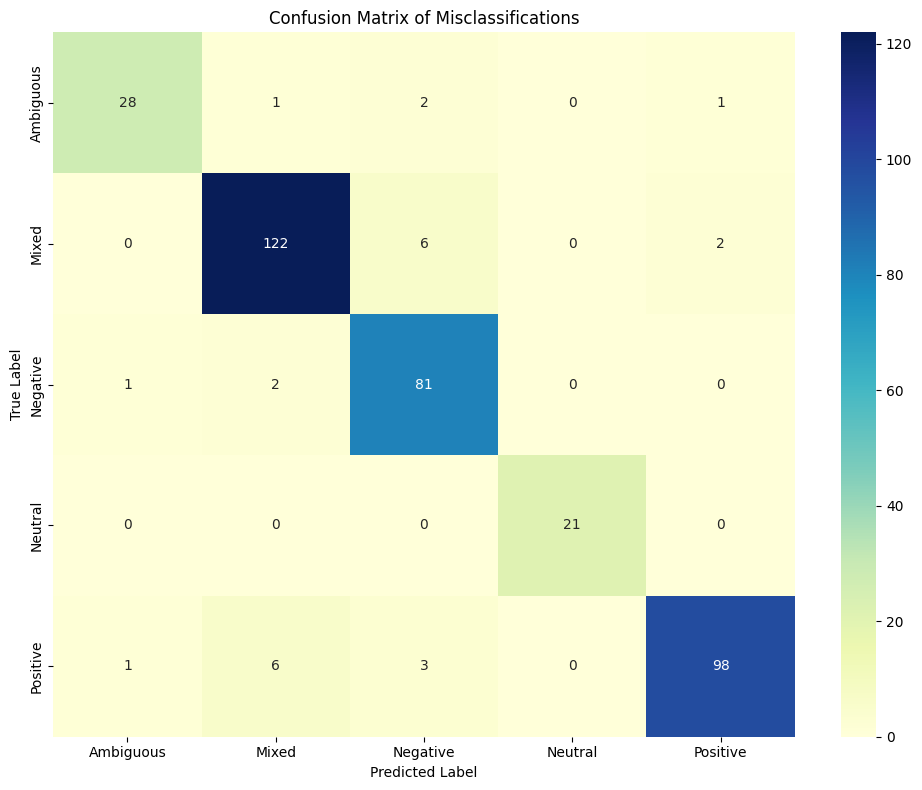


----- Misclassification Breakdown -----
  true_label predicted_label  count
0  Ambiguous           Mixed      1
1  Ambiguous        Negative      2
2  Ambiguous        Positive      1
3      Mixed        Negative      6
4      Mixed        Positive      2
5   Negative       Ambiguous      1
6   Negative           Mixed      2
7   Positive       Ambiguous      1
8   Positive           Mixed      6
9   Positive        Negative      3


<Figure size 1200x600 with 0 Axes>

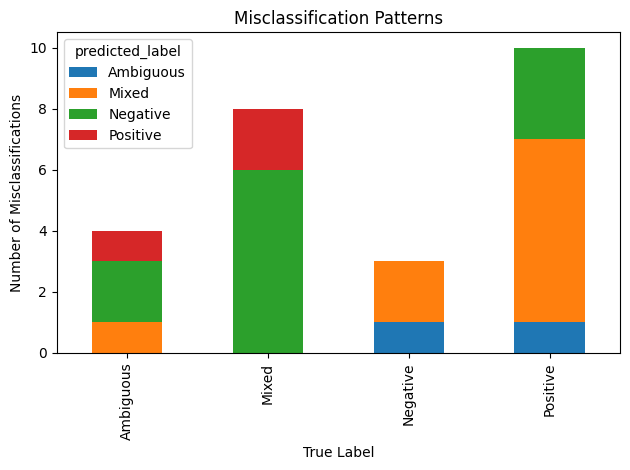


----- Example Misclassifications -----

Misclassified Ambiguous samples:
True: Ambiguous, Predicted: Negative
Text: I’m not sure where I stand anymore. I feel like I’m in the middle of something, but I don’t know what that something is. 🤷‍♂️

True: Ambiguous, Predicted: Positive
Text: Had a quiet evening alone with my thoughts. It’s both peaceful and a little lonely. 🌙

True: Ambiguous, Predicted: Negative
Text: I don’t really know what to think right now. Everything feels up in the air. 🤷‍♂️

True: Ambiguous, Predicted: Mixed
Text: I’ve been so disconnected from my family lately. I miss the old times when we’d spend hours talking. Maybe it’s time to reconnect, but it feels awkward now. 👪


Misclassified Mixed samples:
True: Mixed, Predicted: Negative
Text: I’m feeling hopeful about the future, but there’s still that nagging fear of what could go wrong. 🤔

True: Mixed, Predicted: Negative
Text: I’ve been struggling with feeling like I’m not enough lately. It’s hard when I compare myse

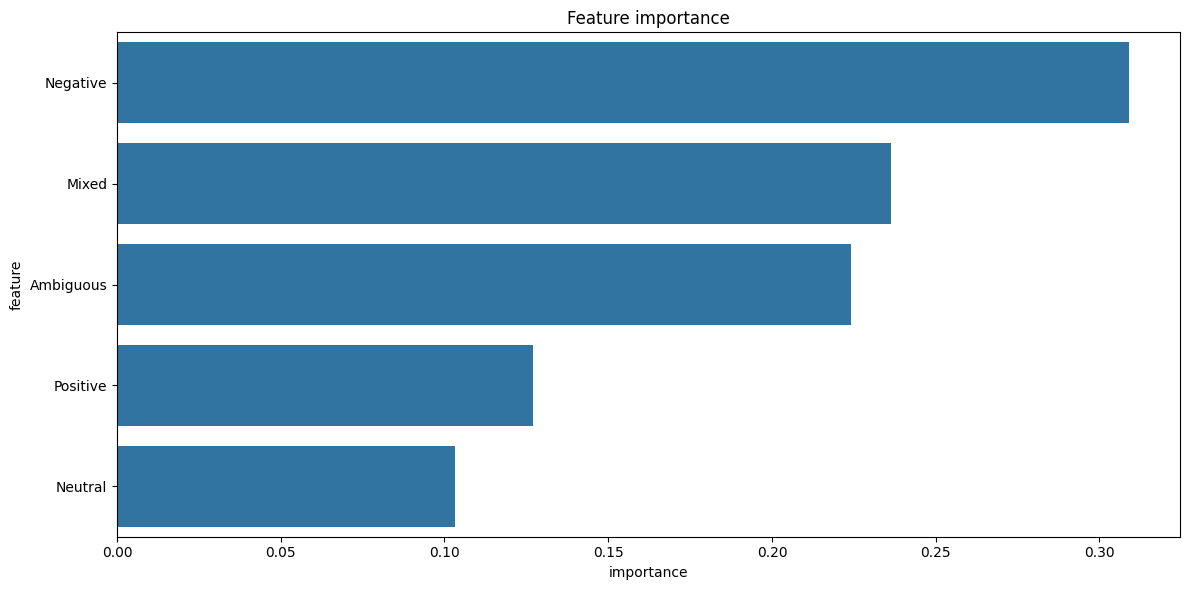

In [10]:
def perform_error_analysis(model, X_test, y_test, original_text=None):
    """
    Comprehensive error analysis for a trained model
    
    Parameters:
    - model: Trained classification model
    - X_test: Test feature matrix
    - y_test: True labels
    - original_text: Optional original text for deeper analysis
    
    Returns:
    - Detailed error analysis dataframe
    """
    # Predict and get predictions
    y_pred = model.predict(X_test)
    
    # Create error analysis dataframe
    error_df = pd.DataFrame({
        'true_label': y_test,
        'predicted_label': y_pred,
        'is_correct': y_test == y_pred
    })
    
    # Add original text if provided
    if original_text is not None:
        error_df['text'] = original_text
    
    # Detailed misclassification analysis
    misclassified = error_df[~error_df['is_correct']]
    
    # Print overall error statistics
    print("\n----- Error Analysis Summary -----")
    print(f"Total Samples: {len(y_test)}")
    print(f"Misclassified Samples: {len(misclassified)} ({len(misclassified)/len(y_test)*100:.2f}%)")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
                xticklabels=sorted(np.unique(y_test)), 
                yticklabels=sorted(np.unique(y_test)))
    plt.title('Confusion Matrix of Misclassifications')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    
    # Detailed misclassification breakdown
    print("\n----- Misclassification Breakdown -----")
    misclass_breakdown = misclassified.groupby(['true_label', 'predicted_label']).size().reset_index(name='count')
    print(misclass_breakdown)
    
    # Visualization of misclassifications
    plt.figure(figsize=(12, 6))
    misclass_breakdown.pivot(index='true_label', columns='predicted_label', values='count').plot(kind='bar', stacked=True)
    plt.title('Misclassification Patterns')
    plt.xlabel('True Label')
    plt.ylabel('Number of Misclassifications')
    plt.tight_layout()
    plt.show()
    
    # If original text is provided, show some example misclassifications
    if original_text is not None:
        print("\n----- Example Misclassifications -----")
        for label in np.unique(y_test):
            print(f"\nMisclassified {label} samples:")
            label_misclass = misclassified[misclassified['true_label'] == label]
            
            # Show top 5 misclassified samples for each label
            for idx, row in label_misclass.head().iterrows():
                print(f"True: {row['true_label']}, Predicted: {row['predicted_label']}")
                print(f"Text: {row['text']}\n")
    
    return misclassified

# Load the saved best model
best_model = joblib.load('best_sentiment_model.pkl')

# Split your data
X_train, X_test, y_train, y_test = train_test_split(
    lexicon_features, 
    y_sentiment, 
    test_size=0.2, 
    random_state=420, 
    stratify=y_sentiment
)


error_analysis_results = perform_error_analysis(
    best_model, 
    X_test, 
    y_test, 
    original_text=original_text_data  # Pass your original text data here
)

# Additional in-depth analysis of feature importance (if applicable)
def feature_importance_analysis(model, feature_names):
    """
    Analyze feature importance for models that support it
    """
    try:
        # For Random Forest
        if hasattr(model, 'feature_importances_'):
            feature_importance = pd.DataFrame({
                'feature': feature_names,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            plt.figure(figsize=(12, 6))
            sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
            plt.title('Feature importance')
            plt.tight_layout()
            plt.show()
            
            return feature_importance
    
    except Exception as e:
        print("Feature importance analysis not supported for this model type.")
        return None

# Example of feature importance (if applicable)
feature_importance = feature_importance_analysis(best_model, feature_names=['Ambiguous', 'Mixed' ,'Negative', 'Neutral', 'Positive'])

# Let's see the missclassifications with the Vader Model


----- Error Analysis Summary -----
Total Samples: 375
Misclassified Samples: 81 (21.60%)


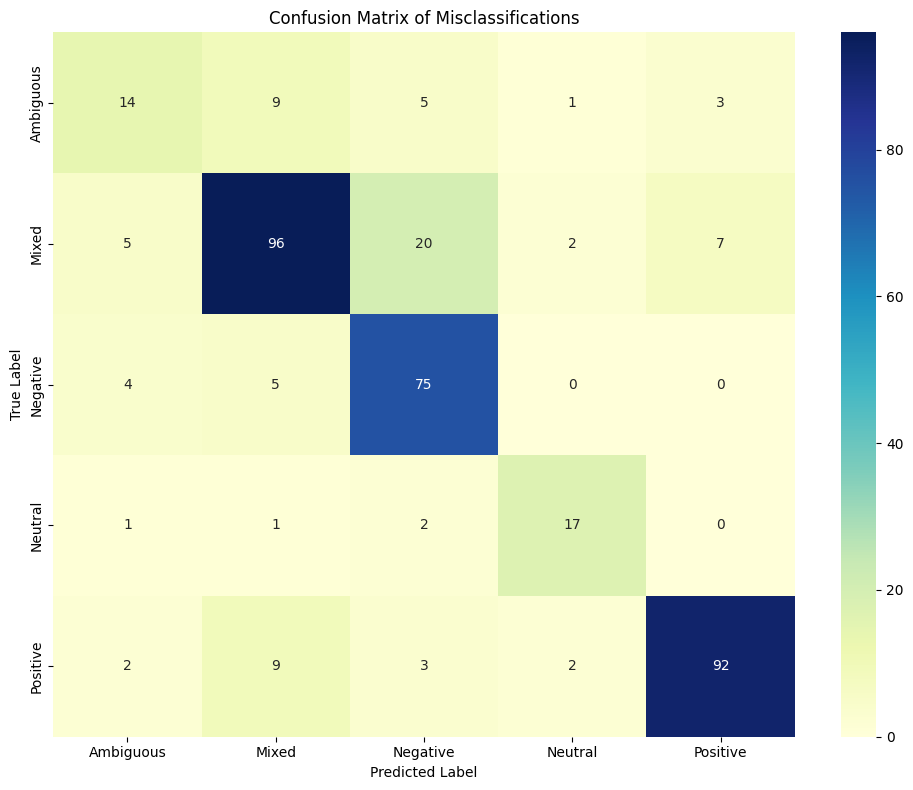


----- Misclassification Breakdown -----
   true_label predicted_label  count
0   Ambiguous           Mixed      9
1   Ambiguous        Negative      5
2   Ambiguous         Neutral      1
3   Ambiguous        Positive      3
4       Mixed       Ambiguous      5
5       Mixed        Negative     20
6       Mixed         Neutral      2
7       Mixed        Positive      7
8    Negative       Ambiguous      4
9    Negative           Mixed      5
10    Neutral       Ambiguous      1
11    Neutral           Mixed      1
12    Neutral        Negative      2
13   Positive       Ambiguous      2
14   Positive           Mixed      9
15   Positive        Negative      3
16   Positive         Neutral      2


<Figure size 1200x600 with 0 Axes>

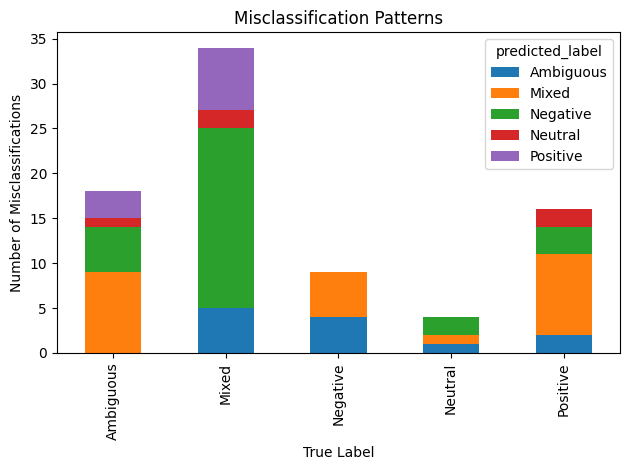

In [11]:
def perform_error_analysis(model, X_test, y_test, original_text=None):
    """
    Comprehensive error analysis for a trained model
    
    Parameters:
    - model: Trained classification model
    - X_test: Test feature matrix
    - y_test: True labels
    - original_text: Optional original text for deeper analysis
    
    Returns:
    - Detailed error analysis dataframe
    """
    # Predict and get predictions
    y_pred = model.predict(X_test)
    
    # Create error analysis dataframe
    error_df = pd.DataFrame({
        'true_label': y_test,
        'predicted_label': y_pred,
        'is_correct': y_test == y_pred
    })
    
    # Add original text if provided
    if original_text is not None:
        error_df['text'] = original_text
    
    # Detailed misclassification analysis
    misclassified = error_df[~error_df['is_correct']]
    
    # Print overall error statistics
    print("\n----- Error Analysis Summary -----")
    print(f"Total Samples: {len(y_test)}")
    print(f"Misclassified Samples: {len(misclassified)} ({len(misclassified)/len(y_test)*100:.2f}%)")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
                xticklabels=sorted(np.unique(y_test)), 
                yticklabels=sorted(np.unique(y_test)))
    plt.title('Confusion Matrix of Misclassifications')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    
    # Detailed misclassification breakdown
    print("\n----- Misclassification Breakdown -----")
    misclass_breakdown = misclassified.groupby(['true_label', 'predicted_label']).size().reset_index(name='count')
    print(misclass_breakdown)
    
    # Visualization of misclassifications
    plt.figure(figsize=(12, 6))
    misclass_breakdown.pivot(index='true_label', columns='predicted_label', values='count').plot(kind='bar', stacked=True)
    plt.title('Misclassification Patterns')
    plt.xlabel('True Label')
    plt.ylabel('Number of Misclassifications')
    plt.tight_layout()
    plt.show()
    
    # If original text is provided, show some example misclassifications
    if original_text is not None:
        print("\n----- Example Misclassifications -----")
        for label in np.unique(y_test):
            print(f"\nMisclassified {label} samples:")
            label_misclass = misclassified[misclassified['true_label'] == label]
            
            # Show top 5 misclassified samples for each label
            for idx, row in label_misclass.head().iterrows():
                print(f"True: {row['true_label']}, Predicted: {row['predicted_label']}")
                print(f"Text: {row['text']}\n")
    
    return misclassified

# Load the vader model
vadermodel = joblib.load('vadermodel.pkl')

# Split your data - use the tf_bert_vader features
X_train, X_test, y_train, y_test = train_test_split(
    tf_bert_vader_file, 
    y_sentiment, 
    test_size=0.2, 
    random_state=420, 
    stratify=y_sentiment
)

# Get text data corresponding to test set
# Assuming df is your original DataFrame with 'text' column
original_text_test = df.iloc[X_test.index]['text'].values if hasattr(X_test, 'index') else None

# Perform error analysis
error_analysis_results_vader = perform_error_analysis(
    vadermodel, 
    X_test, 
    y_test, 
    original_text=original_text_test
)

In [12]:
# Get the original text for misclassified examples
misclassified_texts = []
for idx in error_analysis_results_vader.index:
    text = df.iloc[idx]["text"]
    true_label = error_analysis_results_vader.loc[idx, "true_label"]
    pred_label = error_analysis_results_vader.loc[idx, "predicted_label"]
    misclassified_texts.append({
        "index": idx,
        "text": text,
        "true_label": true_label,
        "predicted_label": pred_label
    })

# Create a DataFrame with the results
misclassified_with_text = pd.DataFrame(misclassified_texts)

In [13]:
misclassified_with_text

,index,text,true_label,predicted_label
0,234,"I stared at the blank canvas, frustration buil...",Ambiguous,Mixed
1,806,Found out today that my best friend didn’t inv...,Negative,Ambiguous
2,619,When I saw my child finally stand up for thems...,Positive,Mixed
3,1260,I can’t decide whether I should take this job ...,Mixed,Ambiguous
4,1327,I just got the news that my promotion is offic...,Mixed,Positive
...,...,...,...,...
76,1132,I’ve been feeling insecure about my appearance...,Mixed,Negative
77,31,The silence in the room after my question was ...,Negative,Mixed
78,469,When my sibling borrowed my car without asking...,Mixed,Ambiguous
79,1075,I just got rejected from the job I really want...,Mixed,Negative


In [14]:
vader_index_misclassified = misclassified_with_text["index"]

In [15]:
print("Model classes:", best_model.classes_)

Model classes: ['Ambiguous' 'Mixed' 'Negative' 'Neutral' 'Positive']


In [16]:
error_analysis_results

,true_label,predicted_label,is_correct,text
1664,Positive,Negative,False,I’m feeling more motivated than usual today. I...
1670,Mixed,Negative,False,"I’m feeling hopeful about the future, but ther..."
723,Negative,Mixed,False,Lost my favorite earrings today—the ones my mo...
1033,Positive,Mixed,False,I decided to take a day off to focus on my sel...
1134,Mixed,Negative,False,I’ve been struggling with feeling like I’m not...
55,Positive,Mixed,False,"Walking through the ruins of the ancient city,..."
616,Negative,Ambiguous,False,When I found out my best friend shared my secr...
7,Positive,Mixed,False,"When I heard the news, I felt a rush of joy an..."
585,Negative,Mixed,False,When I learned that the park where I played as...
1169,Mixed,Positive,False,I feel drained after a long week of work. I’m ...


In [17]:
index_list = error_analysis_results.index.tolist()

# Let's see which features influenced more - first for the lexicon features

In [18]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

def explain_prediction_with_lime_tabular(model, feature_df, feature_names, class_names, index_to_explain, df=None):
    """
    Explain a prediction using LIME for tabular data with improved prediction handling.

    Parameters:
    - model: trained model with `predict_proba`
    - feature_df: DataFrame containing features used for prediction (e.g., lexicon_features)
    - feature_names: list of feature names
    - class_names: list of sentiment class labels (must match the order expected by the model)
    - index_to_explain: int, index of the instance to explain in the original dataset
    - df: optional DataFrame containing text and sentiment columns for the original data
    """
    # Convert to numpy if needed
    if hasattr(feature_df, 'values'):
        features_array = feature_df.values
    else:
        features_array = feature_df
        
    # Create the explainer with all available data
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=features_array,
        feature_names=feature_names,
        class_names=class_names,
        mode='classification',
        discretize_continuous=True
    )

    # Extract just the features for the instance we want to explain
    if hasattr(feature_df, 'iloc'):
        # Ensure we get a numpy array, not a DataFrame row
        instance_features = feature_df.iloc[index_to_explain].values.reshape(1, -1)
    else:
        instance_features = features_array[index_to_explain].reshape(1, -1)

    # Make prediction for this specific instance
    prediction = model.predict(instance_features)[0]
    prediction_proba = model.predict_proba(instance_features)[0]
    predicted_class = class_names[np.argmax(prediction_proba)]
    
    # Prepare instance for LIME (needs to be 1D)
    instance_for_lime = instance_features.flatten()
    
    # Display text and actual label if available
    if df is not None:
        print(f"Text: {df.iloc[index_to_explain]['text']}")
        print(f"Predicted: {predicted_class} ({np.max(prediction_proba):.4f})")
        print(f"Actual label: {df.iloc[index_to_explain]['sentiment']}")
        
        # Check if the prediction is correct
        is_correct = predicted_class == df.iloc[index_to_explain]['sentiment']
        print(f"Prediction {'CORRECT' if is_correct else 'INCORRECT'}")
    else:
        print(f"✅ Predicted: {predicted_class} ({np.max(prediction_proba):.4f})")

    # Generate the explanation
    exp = explainer.explain_instance(
        data_row=instance_for_lime,
        predict_fn=model.predict_proba,
        num_features=min(20, len(feature_names))  # Limit to 20 features for readability
    )

    # Visualize the explanation
    plt.figure(figsize=(10, 6))
    exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for Prediction: {predicted_class}", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Show the top features
    print("\nTop features influencing the prediction:")
    for feature, weight in exp.as_list()[:10]:  # Show top 10 features
        print(f"  {feature}: {weight:.4f}")

    return exp


===== Missclassifications =====
Text: Lost my favorite earrings today—the ones my mom gave me before she passed. I feel like crying, but I’m reminding myself it’s the memories that matter, not the objects. 💔
Predicted: Mixed (0.5700)
Actual label: Negative
Prediction INCORRECT


<Figure size 1000x600 with 0 Axes>

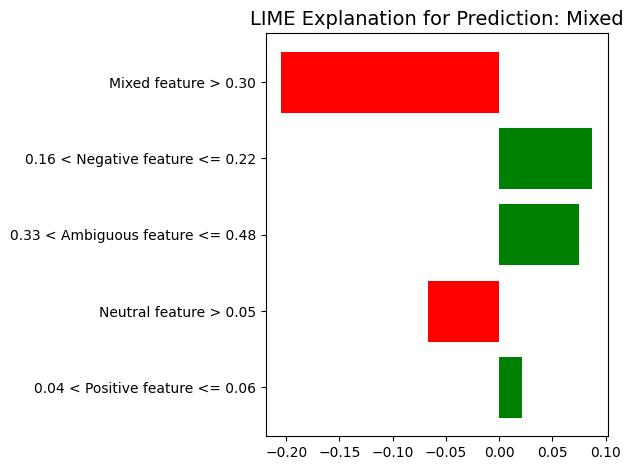


Top features influencing the prediction:
  Mixed feature > 0.30: -0.2044
  0.16 < Negative feature <= 0.22: 0.0873
  0.33 < Ambiguous feature <= 0.48: 0.0755
  Neutral feature > 0.05: -0.0666
  0.04 < Positive feature <= 0.06: 0.0216

===== Missclassifications =====
Text: I’ve been struggling with feeling like I’m not enough lately. It’s hard when I compare myself to others, but then I remind myself that I’m on my own journey. I just wish I could stop feeling like I’m falling behind. 🏃‍♂️
Predicted: Negative (1.0000)
Actual label: Mixed
Prediction INCORRECT


<Figure size 1000x600 with 0 Axes>

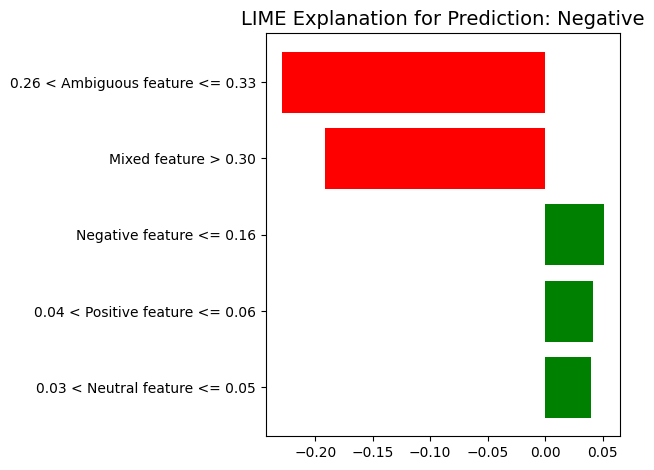


Top features influencing the prediction:
  0.26 < Ambiguous feature <= 0.33: -0.2288
  Mixed feature > 0.30: -0.1915
  Negative feature <= 0.16: 0.0511
  0.04 < Positive feature <= 0.06: 0.0419
  0.03 < Neutral feature <= 0.05: 0.0401

===== Missclassifications =====
Text: When I learned that the park where I played as a child was being turned into a parking lot, I felt an immediate sadness for the loss, but also a determination to speak up and preserve other green spaces in the community.
Predicted: Mixed (0.9900)
Actual label: Negative
Prediction INCORRECT


<Figure size 1000x600 with 0 Axes>

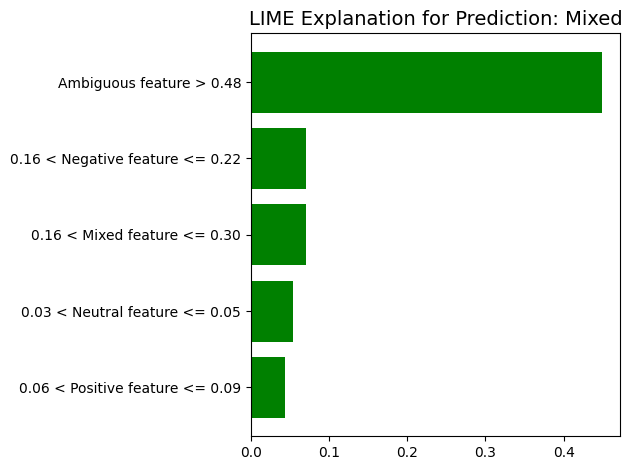


Top features influencing the prediction:
  Ambiguous feature > 0.48: 0.4495
  0.16 < Negative feature <= 0.22: 0.0705
  0.16 < Mixed feature <= 0.30: 0.0700
  0.03 < Neutral feature <= 0.05: 0.0540
  0.06 < Positive feature <= 0.09: 0.0442

===== Missclassifications =====
Text: I’m not sure where I stand anymore. I feel like I’m in the middle of something, but I don’t know what that something is. 🤷‍♂️
Predicted: Negative (0.5400)
Actual label: Ambiguous
Prediction INCORRECT


<Figure size 1000x600 with 0 Axes>

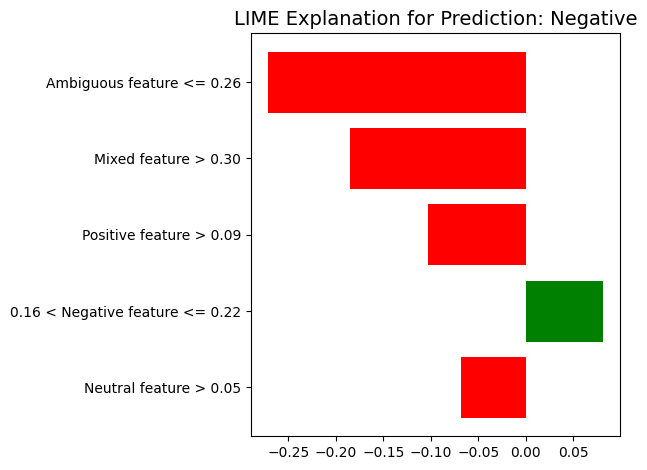


Top features influencing the prediction:
  Ambiguous feature <= 0.26: -0.2720
  Mixed feature > 0.30: -0.1847
  Positive feature > 0.09: -0.1033
  0.16 < Negative feature <= 0.22: 0.0814
  Neutral feature > 0.05: -0.0688

===== Missclassifications =====
Text: I’ve been thinking a lot about how far I’ve come. There are days when I don’t feel like I’m enough, but looking back, I can see how much I’ve grown. It’s a journey, but I’m starting to realize that it’s okay to not have it all figured out. 🌱
Predicted: Mixed (0.7000)
Actual label: Positive
Prediction INCORRECT


<Figure size 1000x600 with 0 Axes>

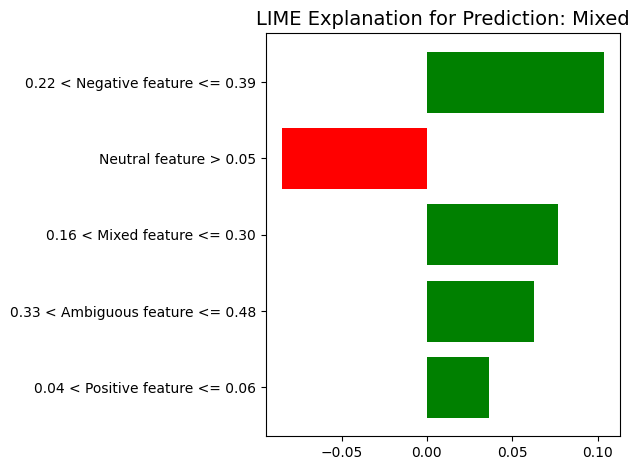


Top features influencing the prediction:
  0.22 < Negative feature <= 0.39: 0.1037
  Neutral feature > 0.05: -0.0849
  0.16 < Mixed feature <= 0.30: 0.0765
  0.33 < Ambiguous feature <= 0.48: 0.0625
  0.04 < Positive feature <= 0.06: 0.0364

===== Missclassifications =====
Text: As I read the glowing review of my performance, I felt a deep pride in my abilities, paired with a subtle doubt about whether I could maintain the same standard moving forward.
Predicted: Ambiguous (0.7900)
Actual label: Positive
Prediction INCORRECT


<Figure size 1000x600 with 0 Axes>

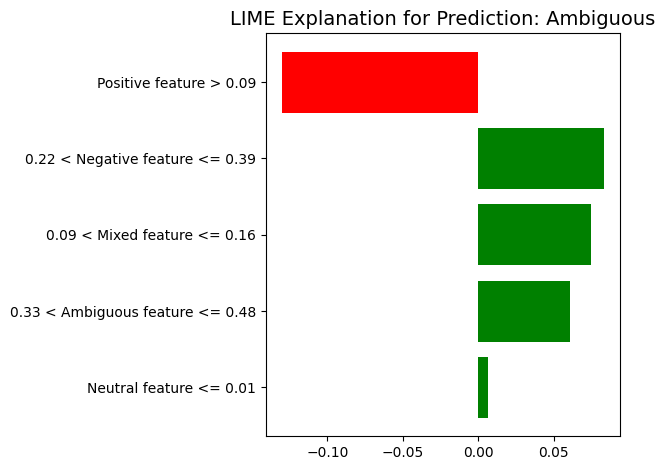


Top features influencing the prediction:
  Positive feature > 0.09: -0.1301
  0.22 < Negative feature <= 0.39: 0.0835
  0.09 < Mixed feature <= 0.16: 0.0748
  0.33 < Ambiguous feature <= 0.48: 0.0609
  Neutral feature <= 0.01: 0.0066

===== Missclassifications =====
Text: Had a quiet evening alone with my thoughts. It’s both peaceful and a little lonely. 🌙
Predicted: Positive (0.4300)
Actual label: Ambiguous
Prediction INCORRECT


<Figure size 1000x600 with 0 Axes>

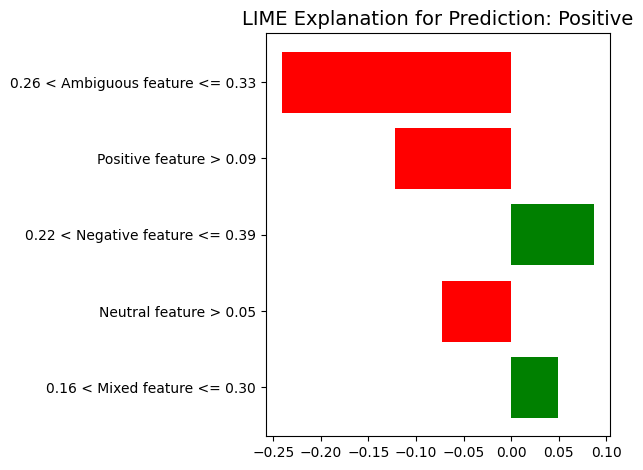


Top features influencing the prediction:
  0.26 < Ambiguous feature <= 0.33: -0.2414
  Positive feature > 0.09: -0.1220
  0.22 < Negative feature <= 0.39: 0.0873
  Neutral feature > 0.05: -0.0726
  0.16 < Mixed feature <= 0.30: 0.0492


In [19]:
class_names = ['Ambiguous', 'Mixed' ,'Negative', 'Neutral', 'Positive']
feature_names = ['Ambiguous feature', 'Mixed feature' ,'Negative feature' ,'Neutral feature' ,'Positive feature']

# Test on a few examples
for index in index_list:
    if index%3 != 0:        #just doing some of them
        continue
    print(f"\n===== Missclassifications =====")
    explain_prediction_with_lime_tabular(
        model=best_model,
        feature_df=lexicon_features,
        feature_names=feature_names,
        class_names=list(sorted(df['sentiment'].unique())),  # Important: maintain consistent order
        index_to_explain=index,
        df=df
    )

# Now some explanations with the Vader Model

Analyzing misclassified example:
Text: When I heard the news, I felt a rush of joy and relief—it was like a weight had been lifted.
True label: Positive
Loaded 3269 TF-IDF feature names
Text index: 7
Predicted: Positive (Confidence: 0.7357)


100%|██████████| 1/1 [00:03<00:00,  3.25s/it]


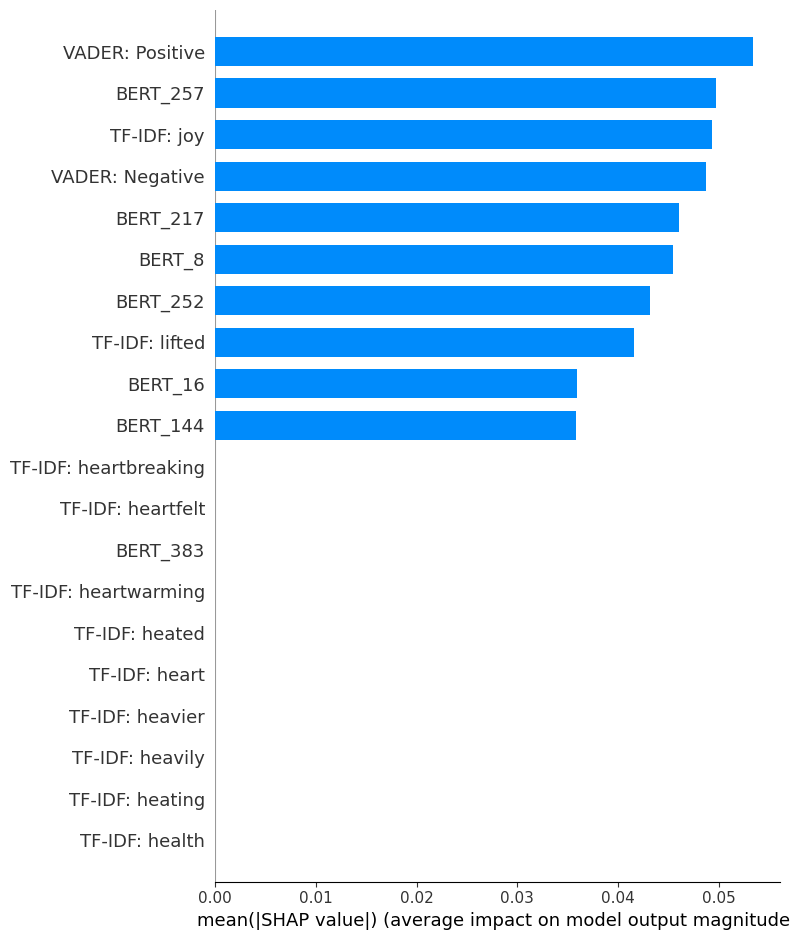

<Figure size 640x480 with 0 Axes>

In [29]:
import shap
import json

def explain_tf_bert_vader_features(model, X_test, index_to_explain, class_names, max_display=20):
    """
    Explain a prediction using SHAP values with proper feature naming for tf_bert_vader features
    
    Parameters:
    - model: Trained model with predict_proba method
    - X_test: Test feature matrix (tf_bert_vader features)
    - index_to_explain: Index of instance to explain
    - class_names: List of class names
    - max_display: Maximum number of features to display
    """
    # Load TF-IDF feature names from the metadata JSON file
    try:
        with open('emotionverse_features_advanced/tfidf_features_metadata.json', 'r') as f:
            tfidf_metadata = json.load(f)
        tfidf_feature_names = tfidf_metadata.get('feature_names', [])
        print(f"Loaded {len(tfidf_feature_names)} TF-IDF feature names")
    except Exception as e:
        print(f"Error loading TF-IDF feature names: {e}")
        # Create generic feature names if loading fails
        tfidf_feature_names = [f"TF-IDF_{i}" for i in range(3269)]
    
    # Extract the instance to explain
    if hasattr(X_test, 'iloc'):
        instance = X_test.iloc[index_to_explain].values.reshape(1, -1)
    else:
        instance = X_test[index_to_explain].reshape(1, -1)
    
    # Convert to dense if needed
    if hasattr(instance, 'toarray'):
        instance = instance.toarray()
    
    # Make prediction for this specific instance
    prediction = model.predict(instance)[0]
    prediction_proba = model.predict_proba(instance)[0]
    predicted_class = class_names[np.argmax(prediction_proba)]
    predicted_class_idx = np.argmax(prediction_proba)
    
    print(f"Text index: {index_to_explain}")
    print(f"Predicted: {predicted_class} (Confidence: {np.max(prediction_proba):.4f})")
    
    # Create a small background dataset (sample for efficiency)
    if hasattr(X_test, 'toarray'):
        # For sparse matrices
        background = shap.sample(X_test.toarray(), 50)  # Sample 50 instances for background
    else:
        background = shap.sample(X_test, 50)
    
    # Create SHAP explainer for the predicted class
    explainer = shap.KernelExplainer(
        lambda x: model.predict_proba(x)[:, predicted_class_idx],
        background,
        link="identity"
    )
    
    # Calculate SHAP values
    shap_values = explainer.shap_values(instance)
    
    # Create custom feature names array with accurate mapping
    all_feature_names = []
    
    # Add TF-IDF feature names (0-3268)
    for i in range(3269):
        if i < len(tfidf_feature_names):
            all_feature_names.append(f"TF-IDF: {tfidf_feature_names[i]}")
        else:
            all_feature_names.append(f"TF-IDF_{i}")
    
    # Add VADER feature names (3269-3272)
    vader_names = ["VADER: Positive", "VADER: Compound", "VADER: Neutral", "VADER: Negative"]
    all_feature_names.extend(vader_names)
    
    # Add BERT embedding feature names (3273-3656)
    for i in range(384):
        all_feature_names.append(f"BERT_{i}")
    
    # Plot SHAP values
    plt.figure(figsize=(12, 10))
    
    # Handle different shapes of shap_values
    if isinstance(shap_values, list):
        shap_data = shap_values[0] if len(shap_values) > 0 else shap_values
    else:
        shap_data = shap_values
    
    # Adjust for flat shap_values
    if len(shap_data.shape) == 1:
        shap_data = shap_data.reshape(1, -1)
    
    # Plot the SHAP values
    shap.summary_plot(
        shap_data, 
        instance,
        feature_names=all_feature_names,
        max_display=max_display,
        plot_type="bar"
    )
    plt.tight_layout()
    plt.show()

    # Get feature importance
    feature_importance = shap_data[0]
    
    # Get feature name and type by index
    def get_feature_info(idx):
        if idx < 3269:
            feature_type = "TF-IDF"
            if idx < len(tfidf_feature_names):
                feature_name = tfidf_feature_names[idx]
            else:
                feature_name = f"feature_{idx}"
            return feature_type, feature_name
        elif idx == 3269:
            return "VADER", "Positive"
        elif idx == 3270:
            return "VADER", "Compound"
        elif idx == 3271:
            return "VADER", "Neutral"
        elif idx == 3272:
            return "VADER", "Negative"
        else:
            return "BERT Embedding", f"{idx - 3273}"
    
    # Get indices of most important features (both positive and negative)
    top_indices = np.argsort(-np.abs(feature_importance))[:max_display]
    
    # Print importance values
    for i, idx in enumerate(top_indices):
        feature_type, feature_name = get_feature_info(idx)
        direction = "+" if feature_importance[idx] > 0 else "-"
        
    
    return shap_values, feature_importance, all_feature_names

# Example usage
# For a specific misclassified example
#index_to_explain = vader_index_misclassified[36]  # First misclassified example
#index_to_explain = 1
index_to_explain = index_list[7]
# Get the original text
original_text = df.iloc[index_to_explain]["text"]
true_label = df.iloc[index_to_explain]["sentiment"]

print(f"Analyzing misclassified example:")
print(f"Text: {original_text}")
print(f"True label: {true_label}")

# Generate SHAP explanation with proper feature names
shap_values, feature_importance, feature_names = explain_tf_bert_vader_features(
    vadermodel, 
    tf_bert_vader_file, 
    index_to_explain, 
    class_names=list(sorted(df['sentiment'].unique()))
)